# Bangalore House Price Prediction - Regression Model

### Import the initial required libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams["figure.figsize"] = (50,20)
plt.rcParams["xtick.labelsize"] = 20
plt.rcParams["ytick.labelsize"] = 20
import warnings
warnings.filterwarnings('ignore')

### Import the train dataset and view the first 5 rows

In [2]:
main = pd.read_csv('train.csv')
main.head()

,ID,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


### Check the data types and info of the features/dataset

In [3]:
main.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10656 entries, 0 to 10655
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ID            10656 non-null  int64  
 1   area_type     10656 non-null  object 
 2   availability  10656 non-null  object 
 3   location      10655 non-null  object 
 4   size          10642 non-null  object 
 5   society       6228 non-null   object 
 6   total_sqft    10656 non-null  object 
 7   bath          10591 non-null  float64
 8   balcony       10152 non-null  float64
 9   price         10656 non-null  float64
dtypes: float64(3), int64(1), object(6)
memory usage: 832.6+ KB


### Let us compute the composition of the missing values for all features

In [4]:
miss_values_composition = main.isnull().sum()/len(main)*100
miss_values_composition

ID               0.000000
area_type        0.000000
availability     0.000000
location         0.009384
size             0.131381
society         41.554054
total_sqft       0.000000
bath             0.609985
balcony          4.729730
price            0.000000
dtype: float64

### Let us drop ID, society and availability columns from the dataset

- We have a total of 10656 rows and 10 columns in the dataset. There are significant missing values in the society column but however we will not be needing this column as they are encrypted (as per the hackathon's instructions).
- We will remove the ID column. ID is a unique valued feature for every row. ID acts as an identifier for the row hence to train our model, we do not need this column.
- We also have missing values in location, size, bath and balcony columns.
- We will drop availability because based on previous iterations, the spread is 80%-20% between Ready to move and Currently occupied (not Ready to move).

In [5]:
main = main.drop(['ID','availability','society'], axis = 1)

- 4.72% of the values in the balcony column is missing. We can either treat these missing values or we can drop the rows containing missing values, since, we will only be eliminating approximately just 5.5% of the data. In our case, let us drop these rows containing the missing values as we still have enough data in our dataset to train our model.

In [6]:
main = main.dropna()

In [7]:
miss_values_composition = main.isnull().sum()/len(main)*100
miss_values_composition

area_type     0.0
location      0.0
size          0.0
total_sqft    0.0
bath          0.0
balcony       0.0
price         0.0
dtype: float64

- We now do not have any missing values in any of the rows.

In [8]:
main.head()

,area_type,location,size,total_sqft,bath,balcony,price
0,Super built-up Area,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07
1,Plot Area,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00
2,Built-up Area,Uttarahalli,3 BHK,1440,2.0,3.0,62.00
3,Super built-up Area,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00
4,Super built-up Area,Kothanur,2 BHK,1200,2.0,1.0,51.00


### Let us describe the data and check its trend

In [9]:
main.describe()

,bath,balcony,price
count,10151.000000,10151.000000,10151.000000
mean,2.616688,1.581716,105.714458
std,1.246454,0.821387,128.936729
min,1.000000,0.000000,8.000000
25%,2.000000,1.000000,49.000000
50%,2.000000,2.000000,70.000000
75%,3.000000,2.000000,115.000000
max,40.000000,3.000000,2700.000000


Looking at the bath feature we can say that the data is skewed considering the 75% percentile value to be at 3 while the max value is 40. Also for a house to have 40 bathrooms is highly unlikely.

### Let us perform some Exploratory Data Analysis and understand the relationship among the features

### Let us explore the feature size

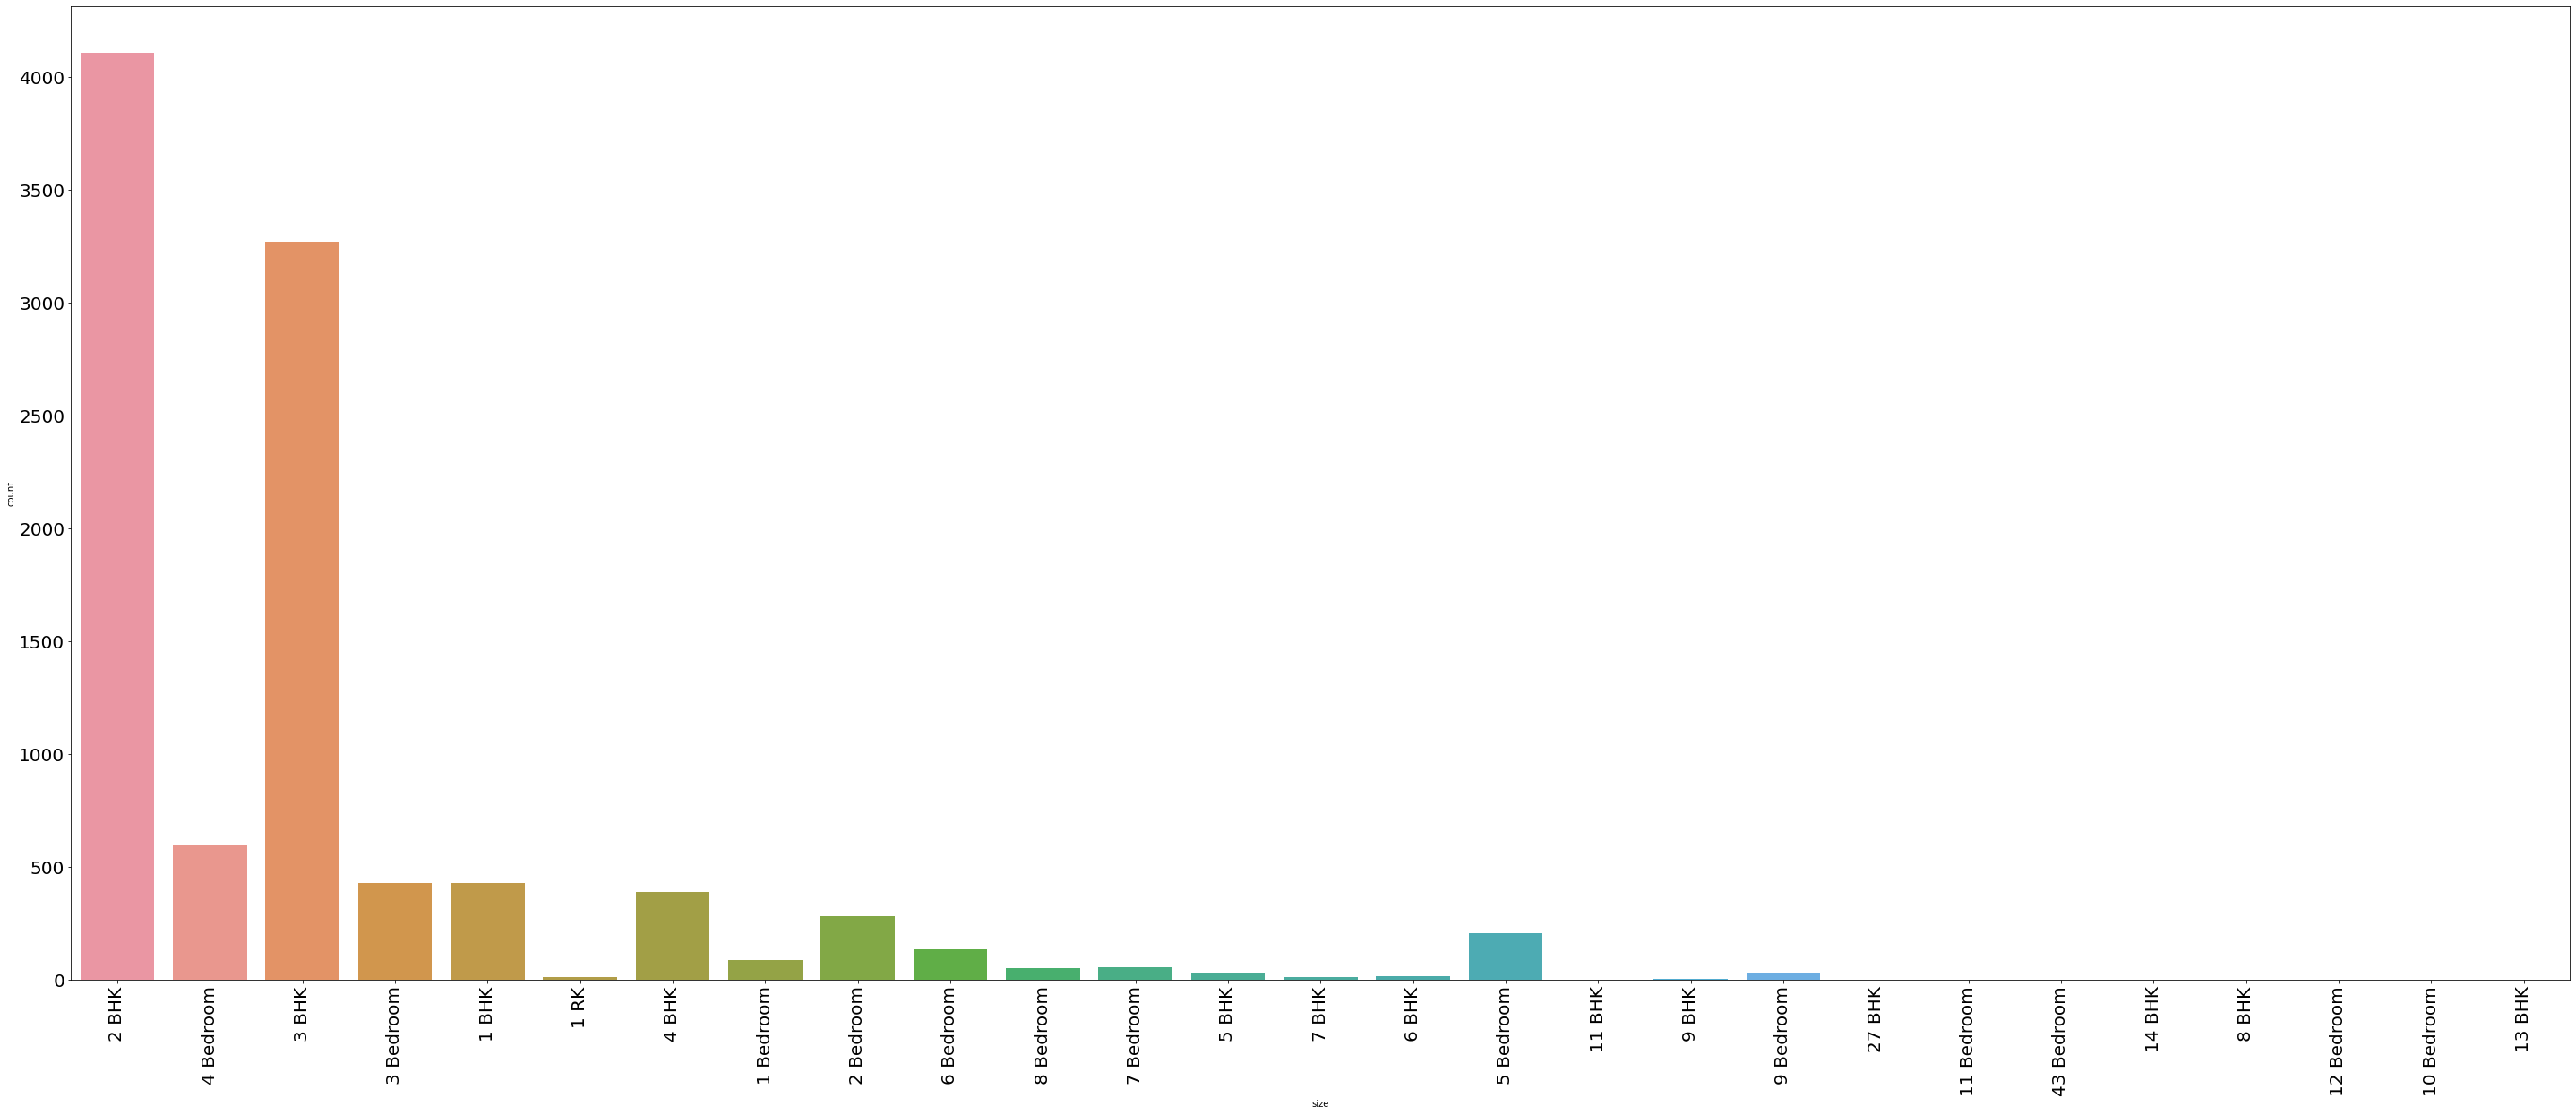

In [10]:
sns.countplot(x = 'size', data = main)
plt.xticks(rotation=90)
plt.show()

- Looking at the graph we can say that there are outliers in the size column

### Let us explore the feature bath

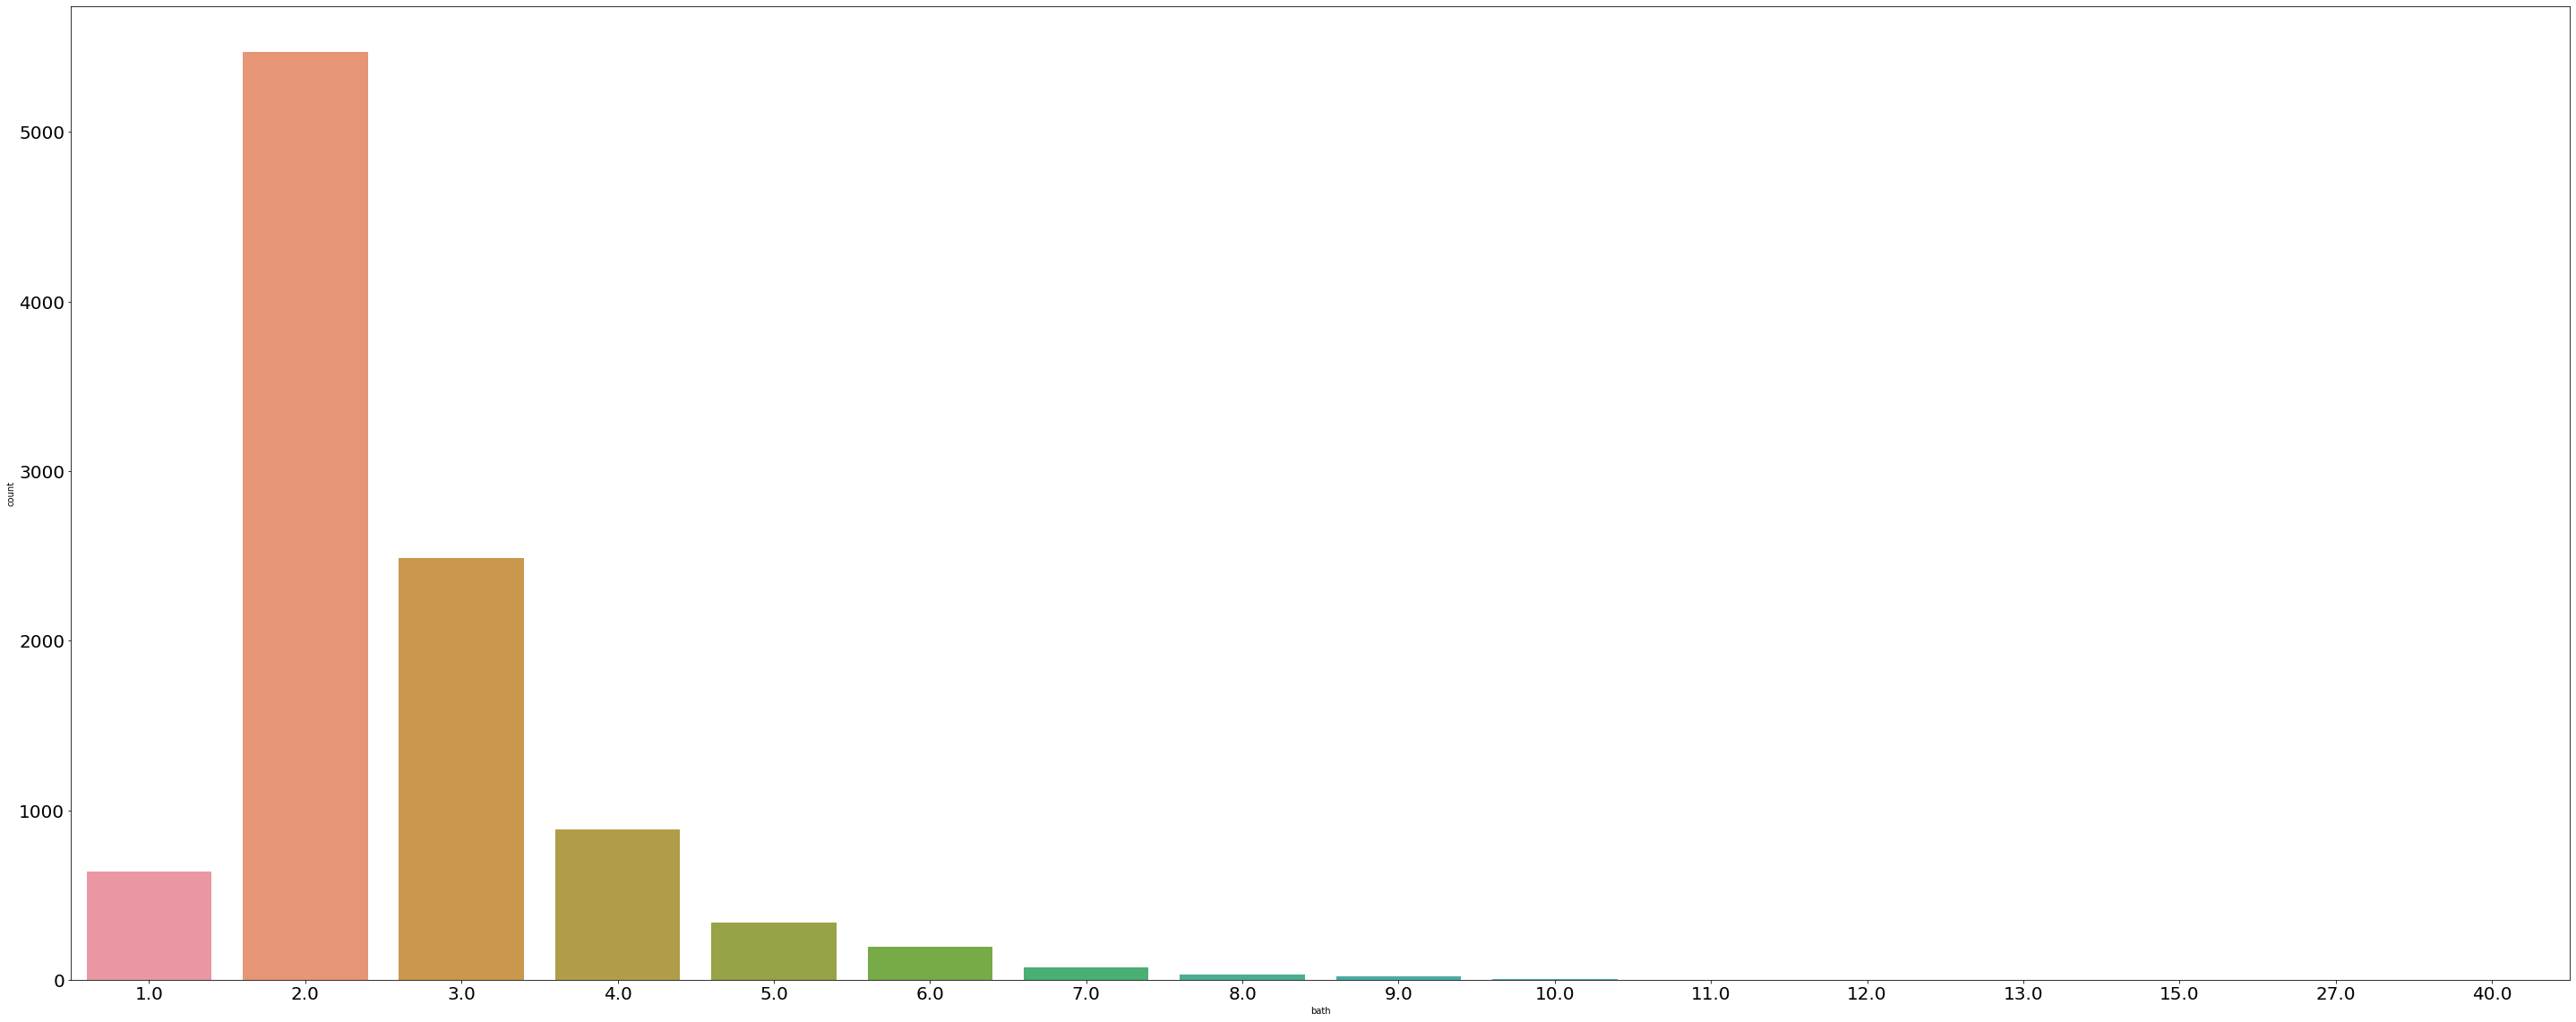

In [11]:
sns.countplot(x = 'bath', data = main)
plt.show()

Looking at the graph we can say that there are outliers in the bath column as well

### Let us explore the feature balcony

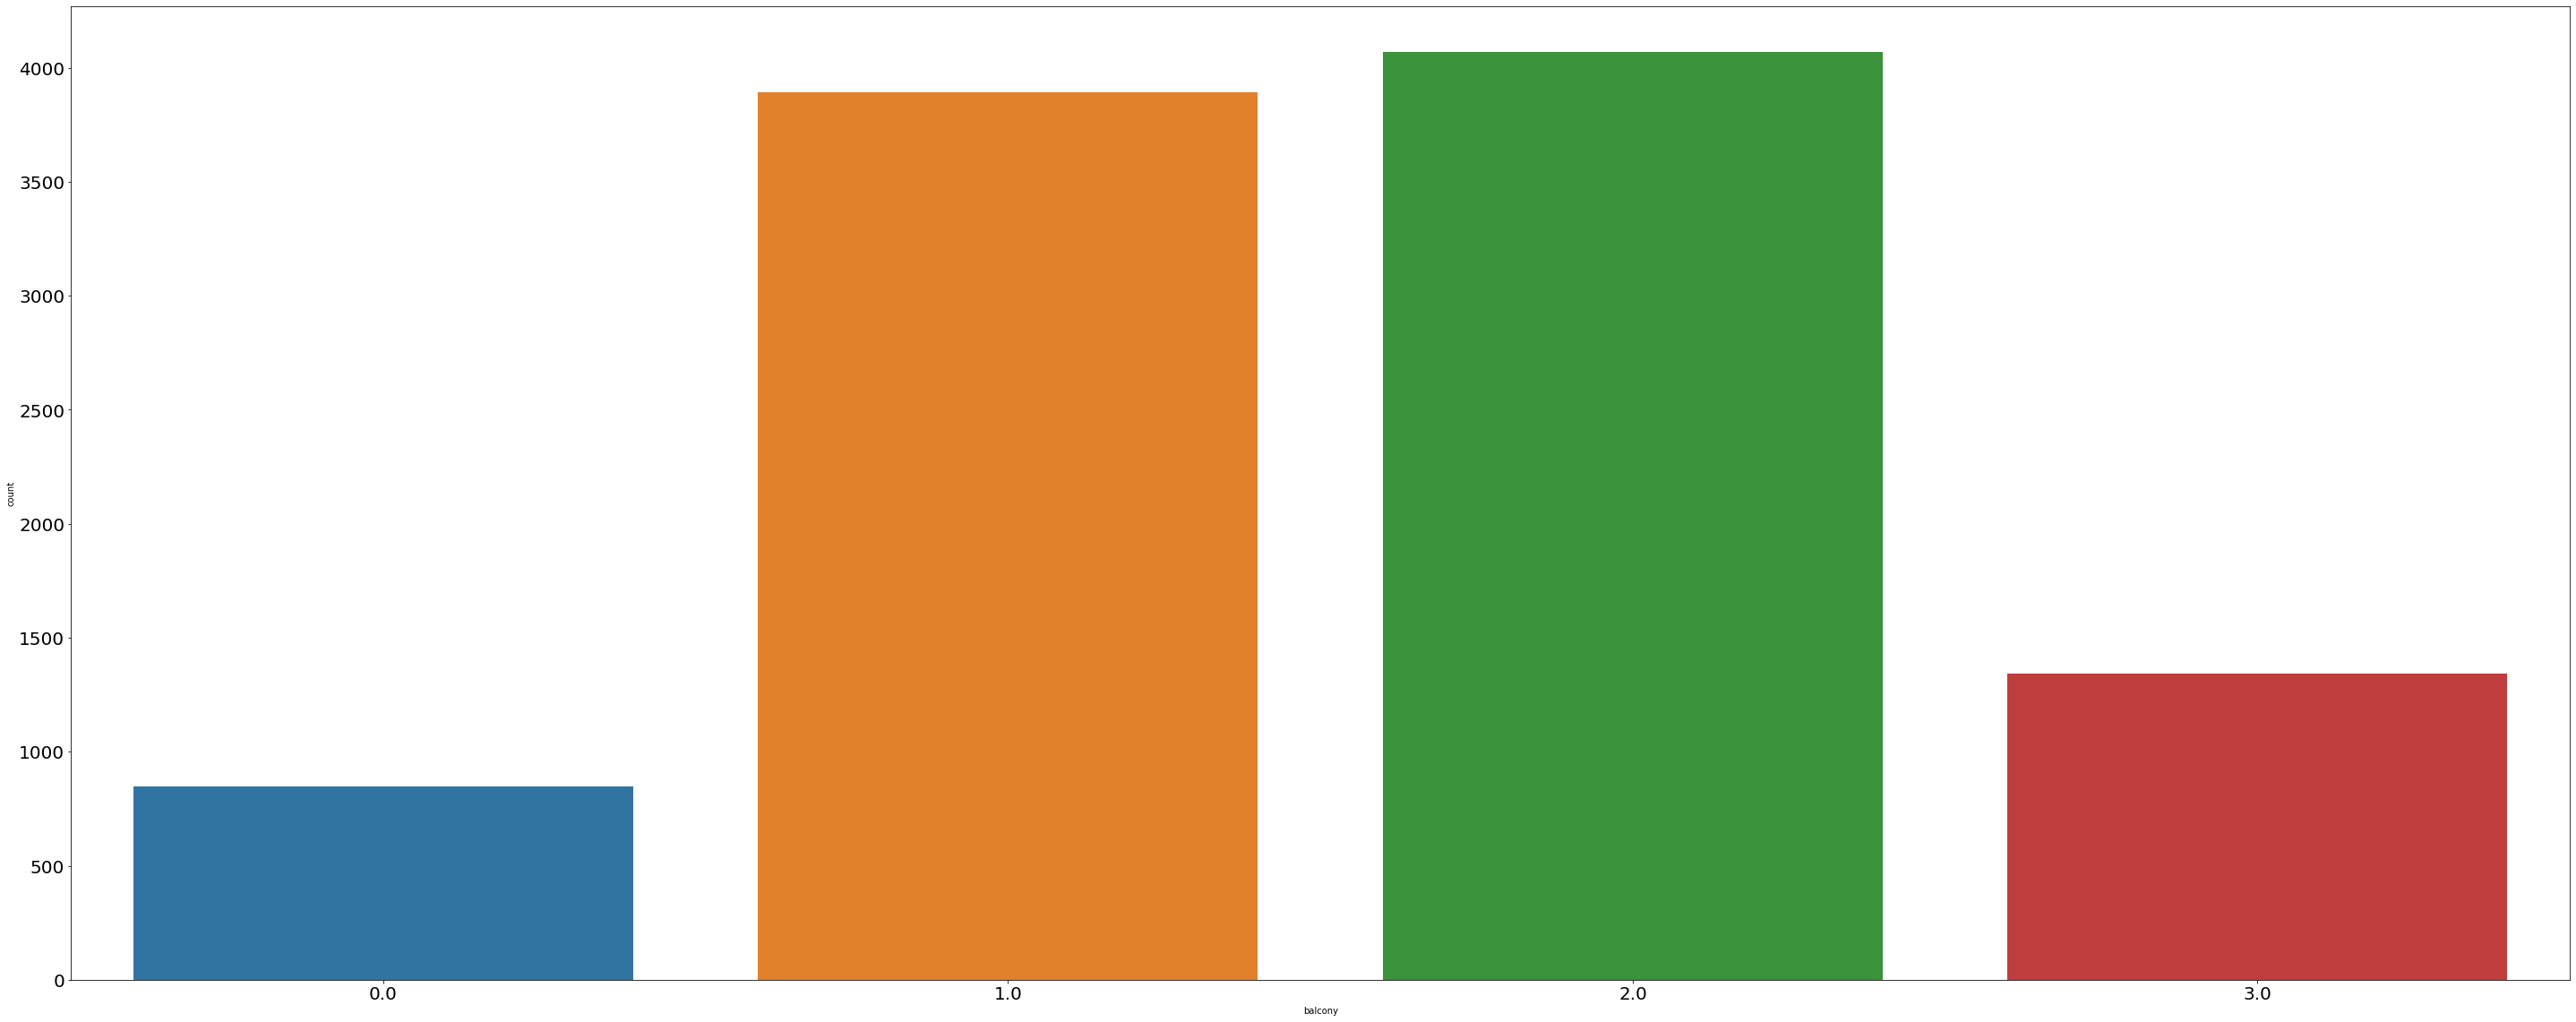

In [12]:
sns.countplot(x = 'balcony', data = main)
plt.show()

- Majority of the houses have 2 Balconies.

### Let us perform some feature engineering to remove the format issues seen in the size column and data value issues seen in the total_sqft column.

### Removing the format issues in size column

In [13]:
main['BHK'] = main['size'].apply(lambda x: int(x.split(' ')[0]))
main.BHK.unique()

array([ 2,  4,  3,  1,  6,  8,  7,  5, 11,  9, 27, 43, 14, 12, 10, 13],
      dtype=int64)

In [14]:
main.head()

,area_type,location,size,total_sqft,bath,balcony,price,BHK
0,Super built-up Area,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07,2
1,Plot Area,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00,4
2,Built-up Area,Uttarahalli,3 BHK,1440,2.0,3.0,62.00,3
3,Super built-up Area,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00,3
4,Super built-up Area,Kothanur,2 BHK,1200,2.0,1.0,51.00,2


### Let us drop the size column since we have formatted this column and added BHK as a new column

In [15]:
main = main.drop('size', axis = 1)

### Standardizing the total_sqft column

- By exploring the excel data we come to see that the total_sqft column has multiple value types like range, sq metres, sq yards, acres, cents. We need to convert all these irregular forms to total sqft format.

### Let us define various functions to convert these irregularities in the column and then apply these functions on the total_sqft column to remove those irregularities

In [16]:
def convert_range_to_avg_sqft(x):
    tokens = str(x).split('-')
    if len(tokens) == 2:
        return (float(tokens[0])+float(tokens[1]))/2
    try:
        return x
    except:
        return None

def convert_Sqmts_to_sqft(x):
    tokens = str(x).split('Sq. Meter')
    if len(tokens) == 2:
        return (float(tokens[0]) * 10.7369)
    try:
        return x
    except:
        return None
    
def convert_Sqyards_to_sqft(x):
    tokens = str(x).split('Sq. Yards')
    if len(tokens) == 2:
        return (float(tokens[0]) * 9)
    try:
        return x
    except:
        return None
    
def convert_Cents_to_sqft(x):
    tokens = str(x).split('Cents')
    if len(tokens) == 2:
        return (float(tokens[0]) * 435.56)
    try:
        return x
    except:
        return None
    
def convert_Acres_to_sqft(x):
    tokens = str(x).split('Acres')
    if len(tokens) == 2:
        return (float(tokens[0]) * 43560)
    try:
        return x
    except:
        return None
    
def convert_Guntha_to_sqft(x):
    tokens = str(x).split('Guntha')
    if len(tokens) == 2:
        return (float(tokens[0]) * 1089)
    try:
        return x
    except:
        return None
    
def convert_Grounds_to_sqft(x):
    tokens = str(x).split('Grounds')
    if len(tokens) == 2:
        return (float(tokens[0]) * 2400)
    try:
        return x
    except:
        return None

In [17]:
main.total_sqft = main.total_sqft.apply(convert_range_to_avg_sqft)
main.total_sqft = main.total_sqft.apply(convert_Sqmts_to_sqft)
main.total_sqft = main.total_sqft.apply(convert_Sqyards_to_sqft)
main.total_sqft = main.total_sqft.apply(convert_Cents_to_sqft)
main.total_sqft = main.total_sqft.apply(convert_Acres_to_sqft)
main.total_sqft = main.total_sqft.apply(convert_Guntha_to_sqft)
main.total_sqft = main.total_sqft.apply(convert_Grounds_to_sqft)

In [18]:
main.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10151 entries, 0 to 10655
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   area_type   10151 non-null  object 
 1   location    10151 non-null  object 
 2   total_sqft  10151 non-null  object 
 3   bath        10151 non-null  float64
 4   balcony     10151 non-null  float64
 5   price       10151 non-null  float64
 6   BHK         10151 non-null  int64  
dtypes: float64(3), int64(1), object(3)
memory usage: 634.4+ KB


### Let us convert the total_sqft column from object type to float type

In [19]:
main['total_sqft'] = main['total_sqft'].astype(float)

In [20]:
main.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10151 entries, 0 to 10655
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   area_type   10151 non-null  object 
 1   location    10151 non-null  object 
 2   total_sqft  10151 non-null  float64
 3   bath        10151 non-null  float64
 4   balcony     10151 non-null  float64
 5   price       10151 non-null  float64
 6   BHK         10151 non-null  int64  
dtypes: float64(4), int64(1), object(2)
memory usage: 634.4+ KB


### Let us describe the data again and see the statistics

In [21]:
main.describe()

,total_sqft,bath,balcony,price,BHK
count,1.015100e+04,10151.000000,10151.000000,10151.000000,10151.000000
mean,1.830400e+03,2.616688,1.581716,105.714458,2.734804
std,1.613853e+04,1.246454,0.821387,128.936729,1.228002
min,5.000000e+00,1.000000,0.000000,8.000000,1.000000
25%,1.095000e+03,2.000000,1.000000,49.000000,2.000000
50%,1.258000e+03,2.000000,2.000000,70.000000,3.000000
75%,1.639000e+03,3.000000,2.000000,115.000000,3.000000
max,1.306800e+06,40.000000,3.000000,2700.000000,43.000000


- We also have 3 at 75th percentile for BHK but 43 at max value of BHK. Unlikely that a house will have 43 BHKs. This is a similar case like Bath data distribution. The data here is skewed. Let us visualize using a scatter plot and see the distribution.

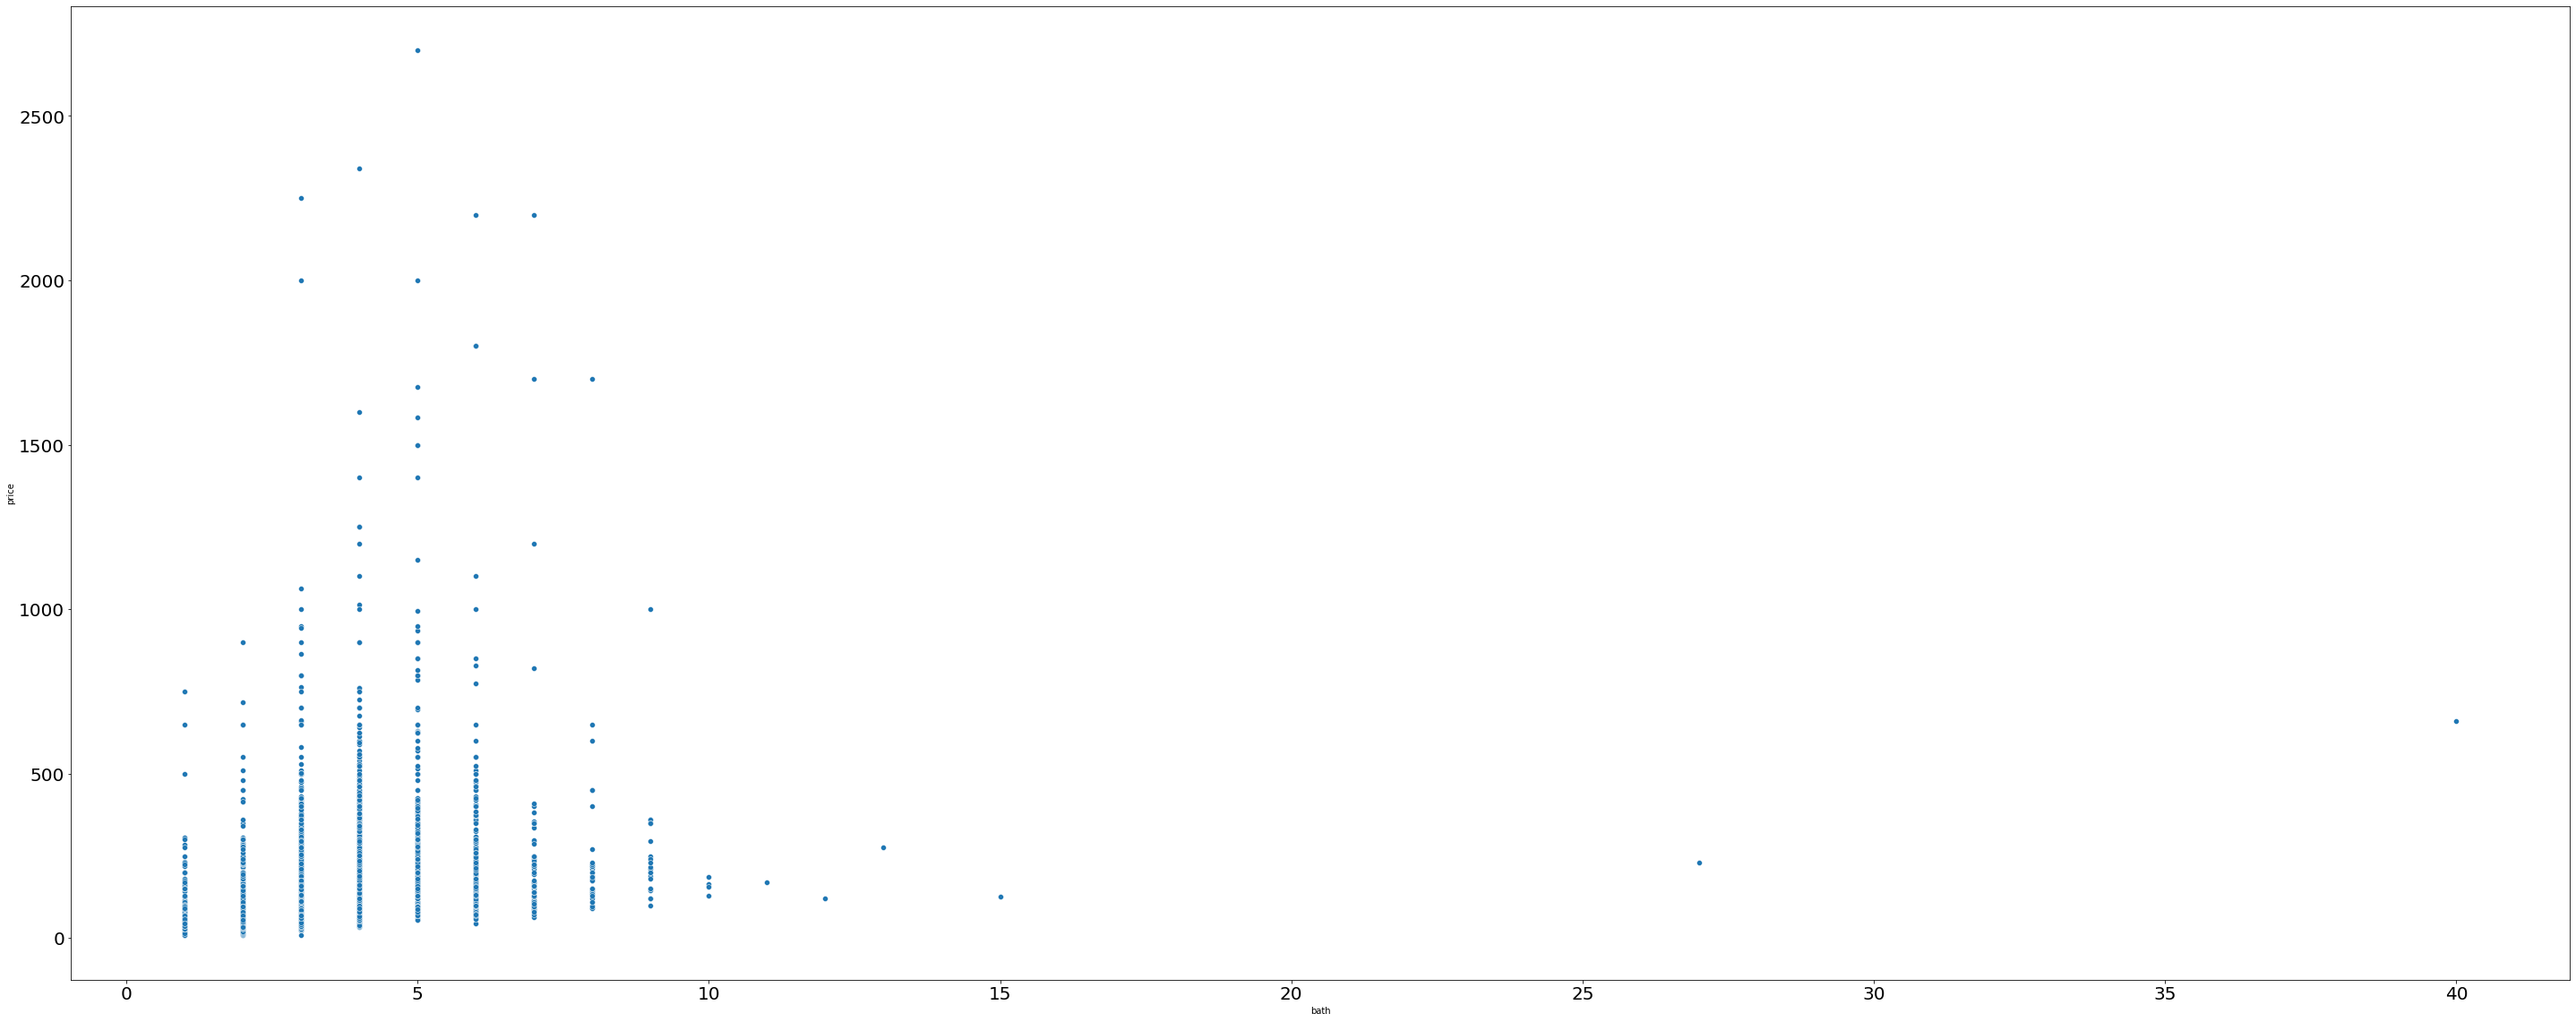

In [22]:
sns.scatterplot(x = 'bath', y = 'price', data = main)
plt.show()

- We have clear outliers after 15 for bath variable.

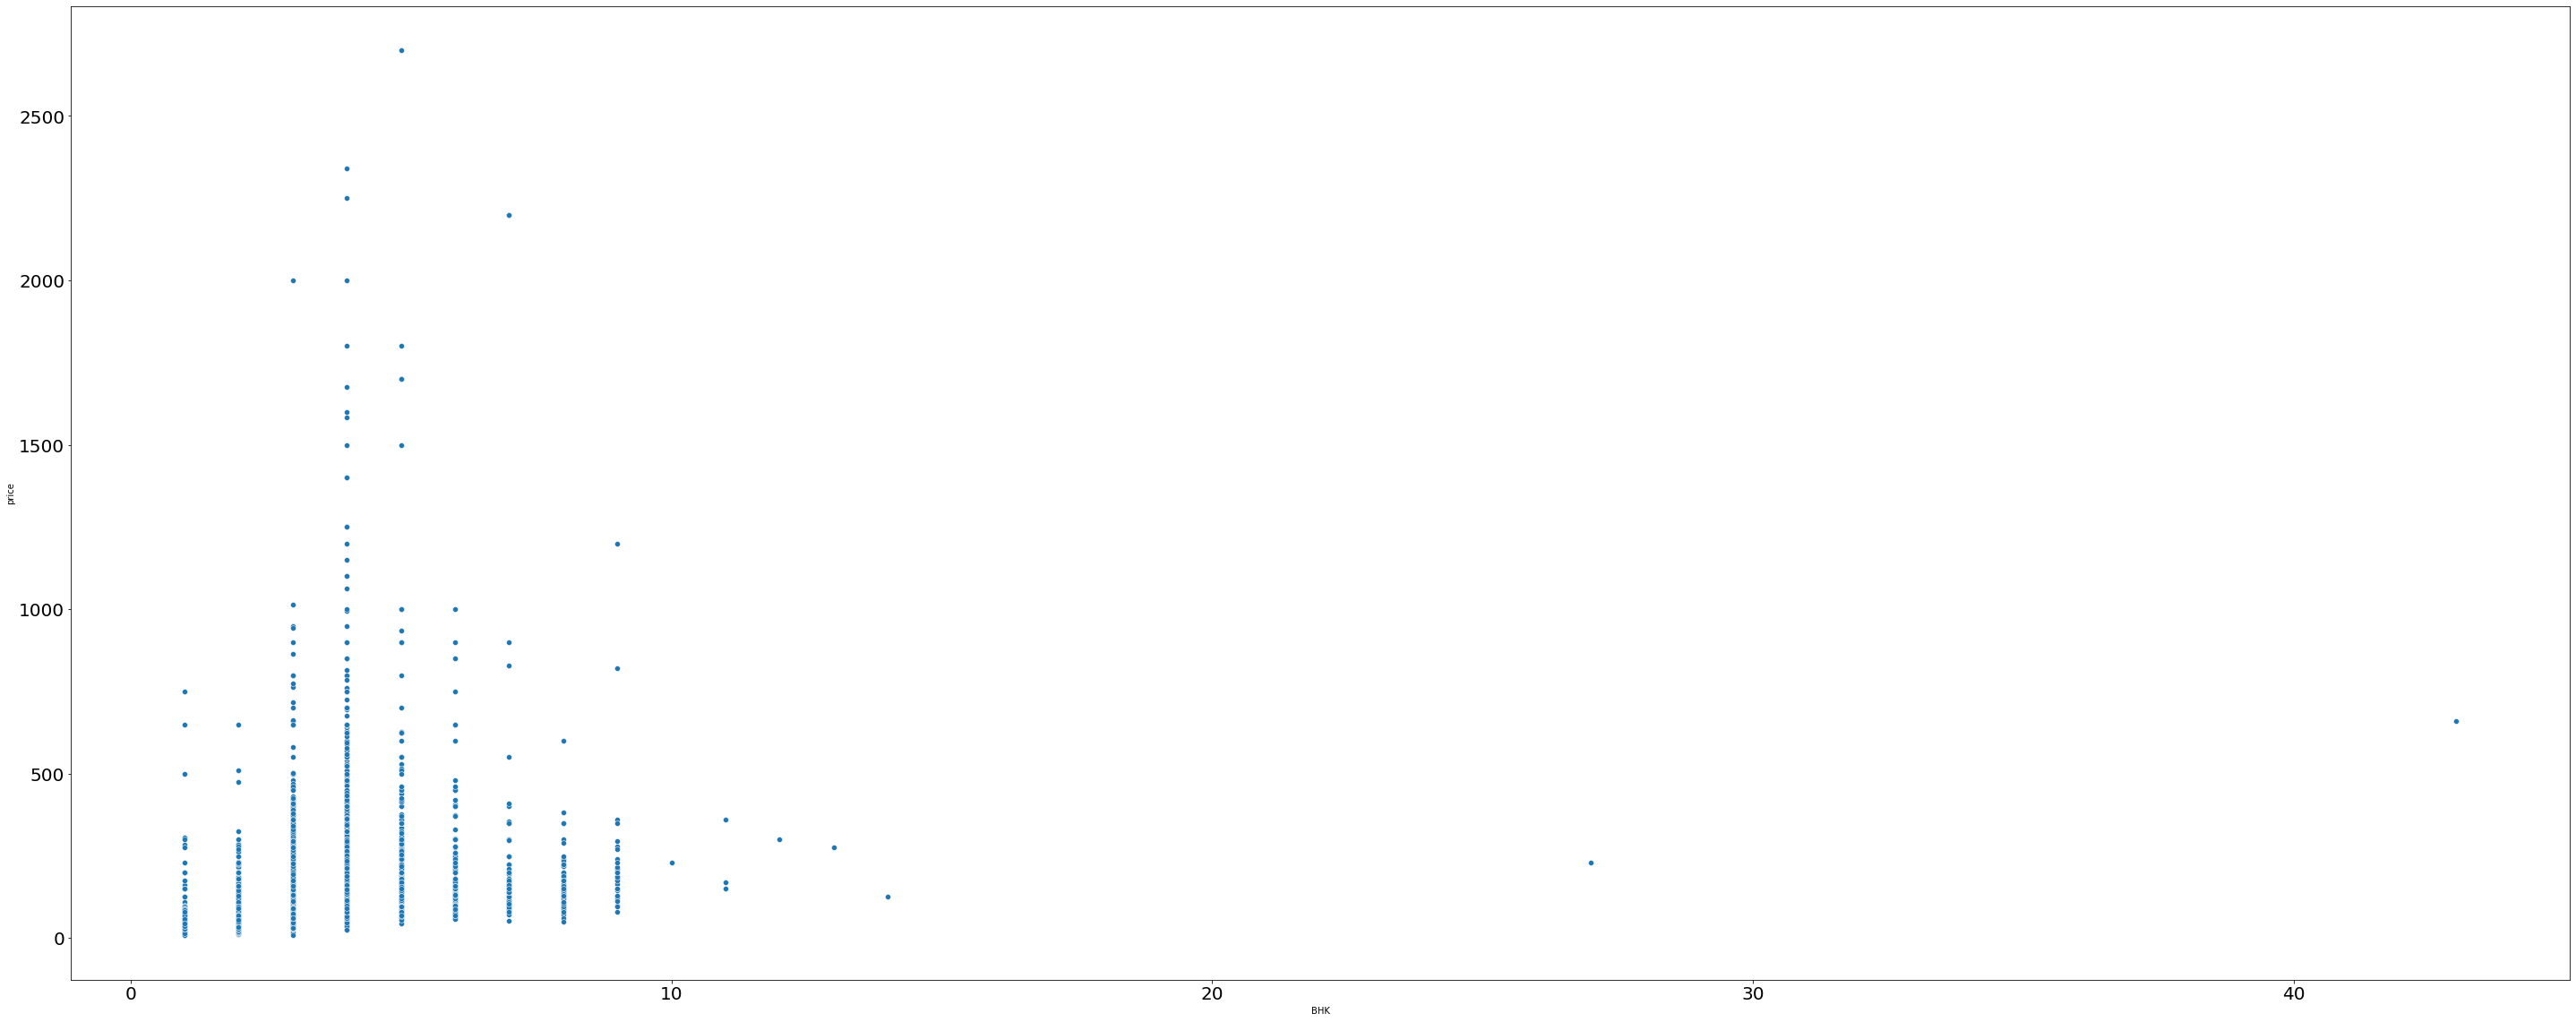

In [23]:
sns.scatterplot(x = 'BHK', y = 'price', data = main)
plt.show()

- We have clear outliers after 15 for BHK variable as well.

### Also, the rows which had 40 bedrooms and bath are outliers. The price is too low for the number of bedrooms or bath the house is offering. Let us delete rows with beds > 15 and baths > 16

In [24]:
main[main['bath'] > 15].index
main = main.drop(main[main['bath'] > 15].index, axis = 0)

In [25]:
main[main['BHK'] > 15].index
main = main.drop(main[main['BHK'] > 15].index, axis = 0)

In [26]:
main

,area_type,location,total_sqft,bath,balcony,price,BHK
0,Super built-up Area,Electronic City Phase II,1056.0,2.0,1.0,39.07,2
1,Plot Area,Chikka Tirupathi,2600.0,5.0,3.0,120.00,4
2,Built-up Area,Uttarahalli,1440.0,2.0,3.0,62.00,3
3,Super built-up Area,Lingadheeranahalli,1521.0,3.0,1.0,95.00,3
4,Super built-up Area,Kothanur,1200.0,2.0,1.0,51.00,2
...,...,...,...,...,...,...,...
10651,Plot Area,Parappana Agrahara,1200.0,1.0,0.0,45.00,1
10652,Super built-up Area,Bhoganhalli,1260.0,2.0,1.0,69.90,2
10653,Super built-up Area,Doddanakundi Industrial Area 2,1092.0,2.0,1.0,49.00,2
10654,Super built-up Area,Kachanayakanahalli,827.0,2.0,0.0,34.00,2


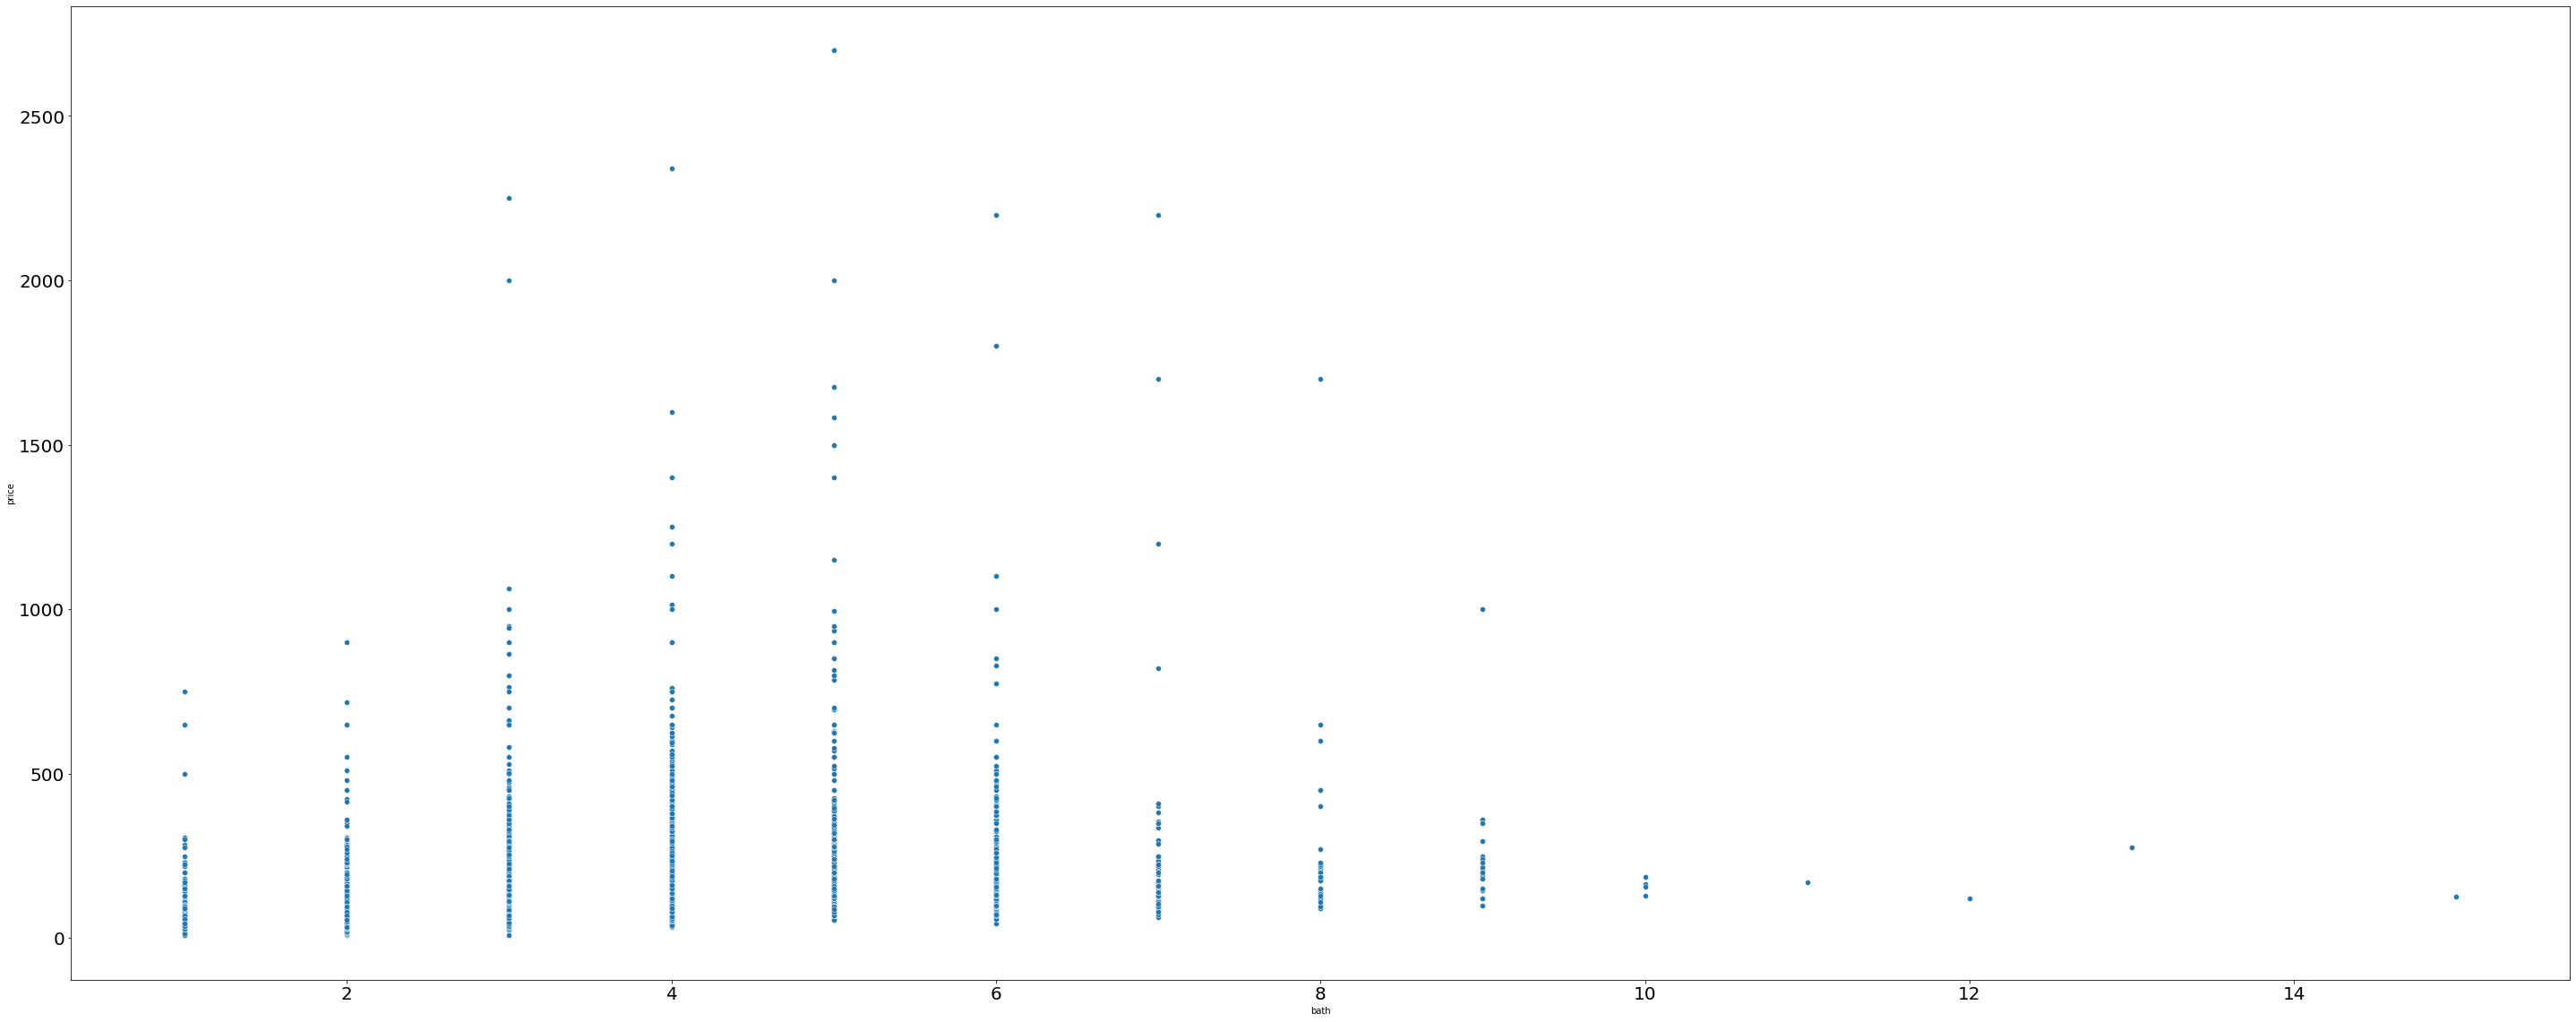

In [27]:
sns.scatterplot(x = 'bath', y = 'price', data = main)
plt.show()

- We have removed the outliers

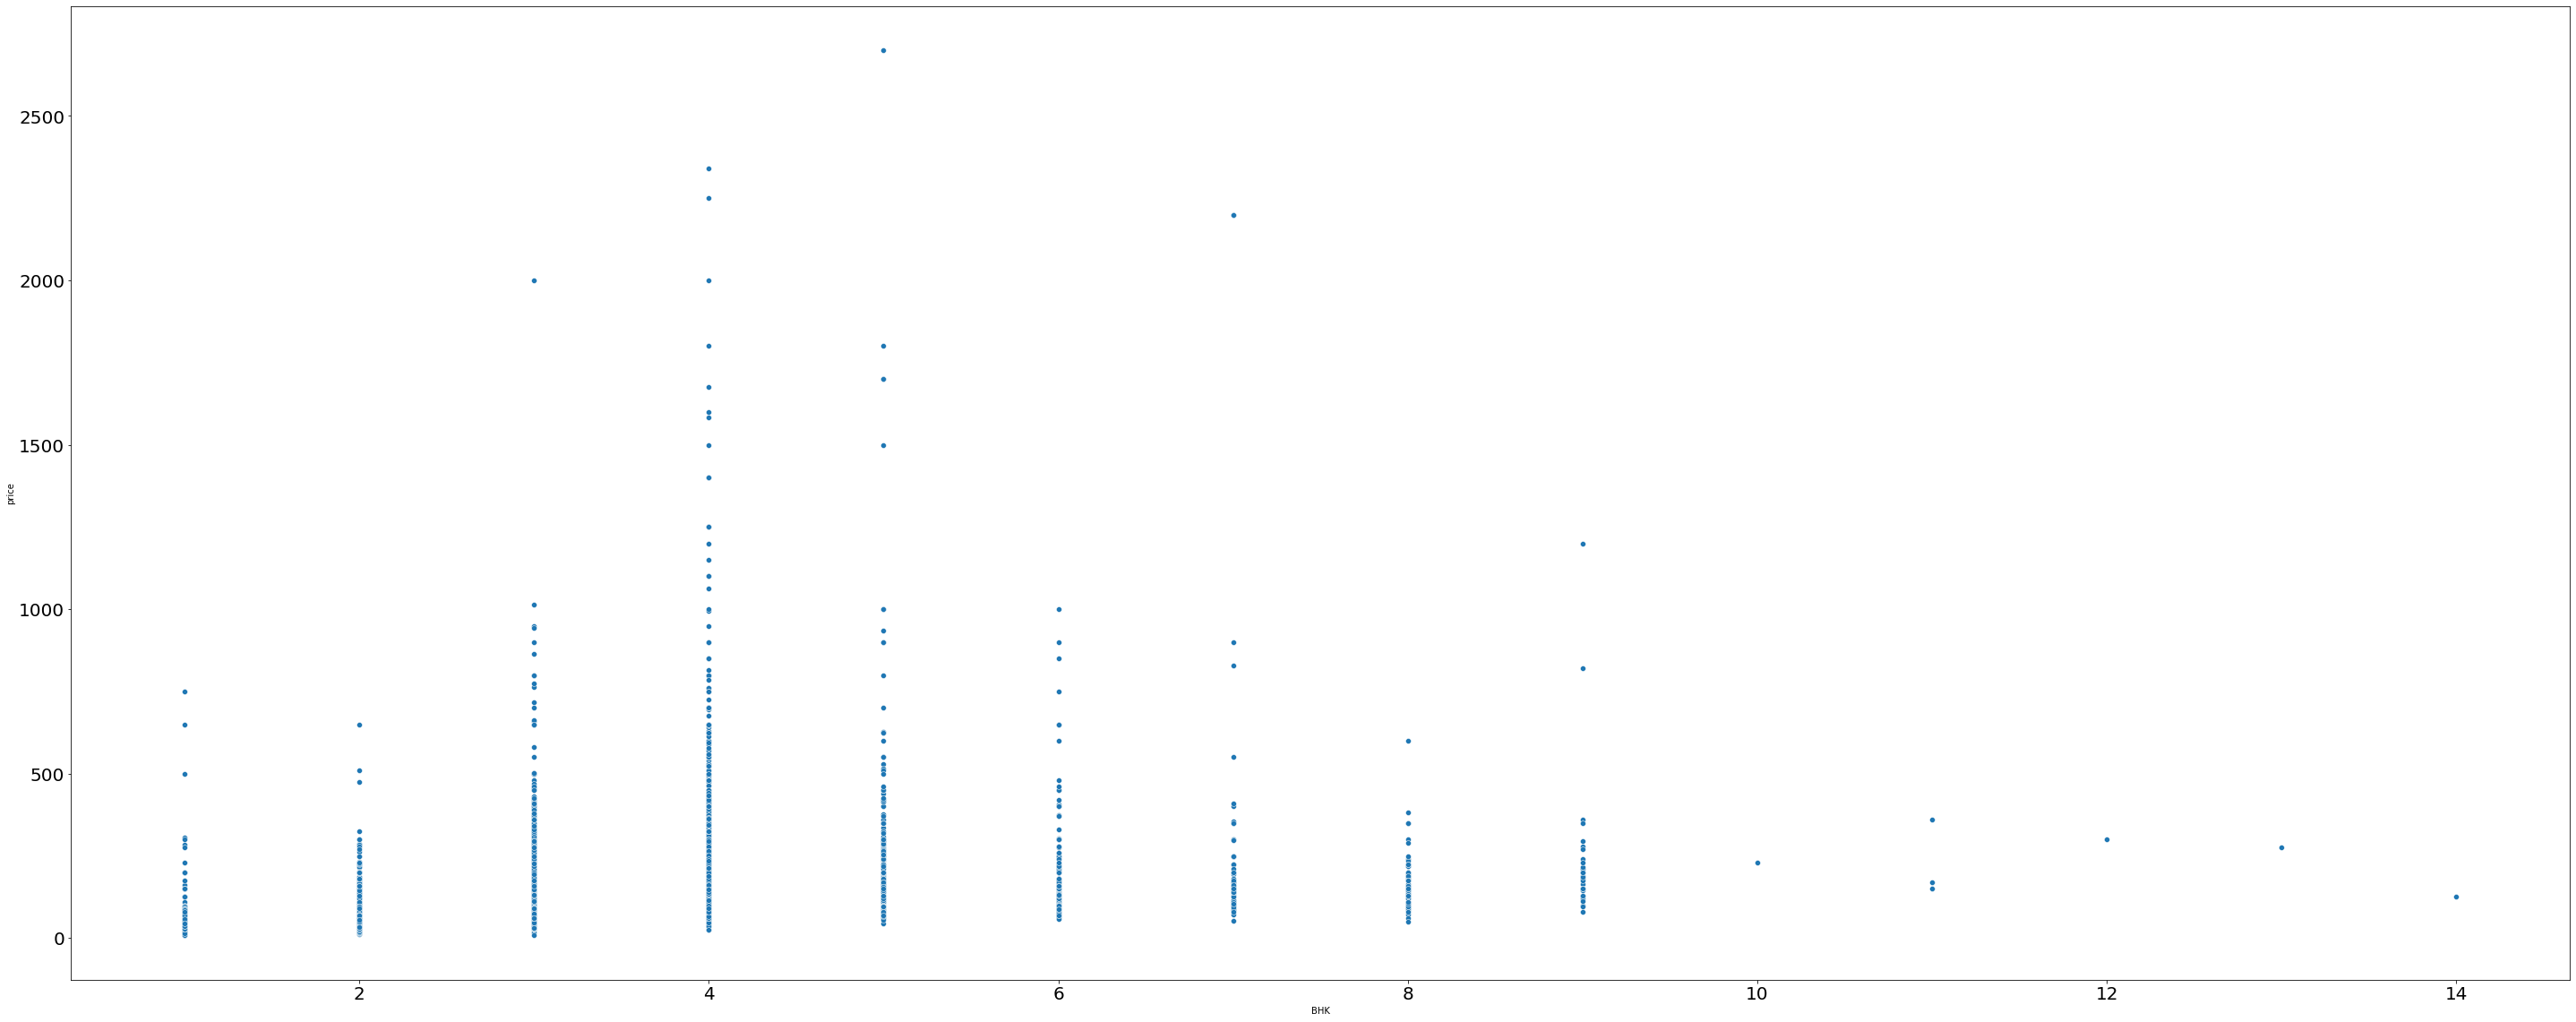

In [28]:
sns.scatterplot(x = 'BHK', y = 'price', data = main)
plt.show()

- We have removed the outliers

### Now let us merge our main dataset with the 2 reference datasets that has avg_2bhk_rent and dist_from_city_centre based on location column and then treat the missing values

In [29]:
rent = pd.read_csv('avg_rent.csv')
rent.head()

,location,avg_2bhk_rent
0,Krishnarajapura,11954
1,Sarjapur,45000
2,Whitefield Hope Farm Junction,26370
3,Devanahalli,17302
4,Whitefield,14981


In [30]:
dist = pd.read_csv('dist_from_city_centre.csv')
dist.head()

,location,dist_from_city
0,Whitefield,17.3
1,Sarjapur Road,17.2
2,Electronic City,18.1
3,Kanakpura Road,26.5
4,Thanisandra,11.5


In [31]:
main = pd.merge(main, rent, 'left', 'location')
main.head()

,area_type,location,total_sqft,bath,balcony,price,BHK,avg_2bhk_rent
0,Super built-up Area,Electronic City Phase II,1056.0,2.0,1.0,39.07,2,11500.0
1,Plot Area,Chikka Tirupathi,2600.0,5.0,3.0,120.00,4,NaN
2,Built-up Area,Uttarahalli,1440.0,2.0,3.0,62.00,3,19750.0
3,Super built-up Area,Lingadheeranahalli,1521.0,3.0,1.0,95.00,3,NaN
4,Super built-up Area,Kothanur,1200.0,2.0,1.0,51.00,2,16375.0


In [32]:
main = pd.merge(main, dist, 'left', 'location')
main.head()

,area_type,location,total_sqft,bath,balcony,price,BHK,avg_2bhk_rent,dist_from_city
0,Super built-up Area,Electronic City Phase II,1056.0,2.0,1.0,39.07,2,11500.0,19.3
1,Plot Area,Chikka Tirupathi,2600.0,5.0,3.0,120.00,4,NaN,34.6
2,Built-up Area,Uttarahalli,1440.0,2.0,3.0,62.00,3,19750.0,12.9
3,Super built-up Area,Lingadheeranahalli,1521.0,3.0,1.0,95.00,3,NaN,21.4
4,Super built-up Area,Kothanur,1200.0,2.0,1.0,51.00,2,16375.0,11.8


In [33]:
main.isnull().sum()

area_type            0
location             0
total_sqft           0
bath                 0
balcony              0
price                0
BHK                  0
avg_2bhk_rent     6634
dist_from_city     956
dtype: int64

### Let us impute the missing values for avg_2bhk_rent with 1.5 times the avg 2bhk rent (because the rent values are for 2 bhks and our main dataset has more than 2bhk houses. To not be biased because of this reason, let us just consider 1.5 times the average so majority that is 3 bhk and 4 bhk houses rents are imputed reasonably.

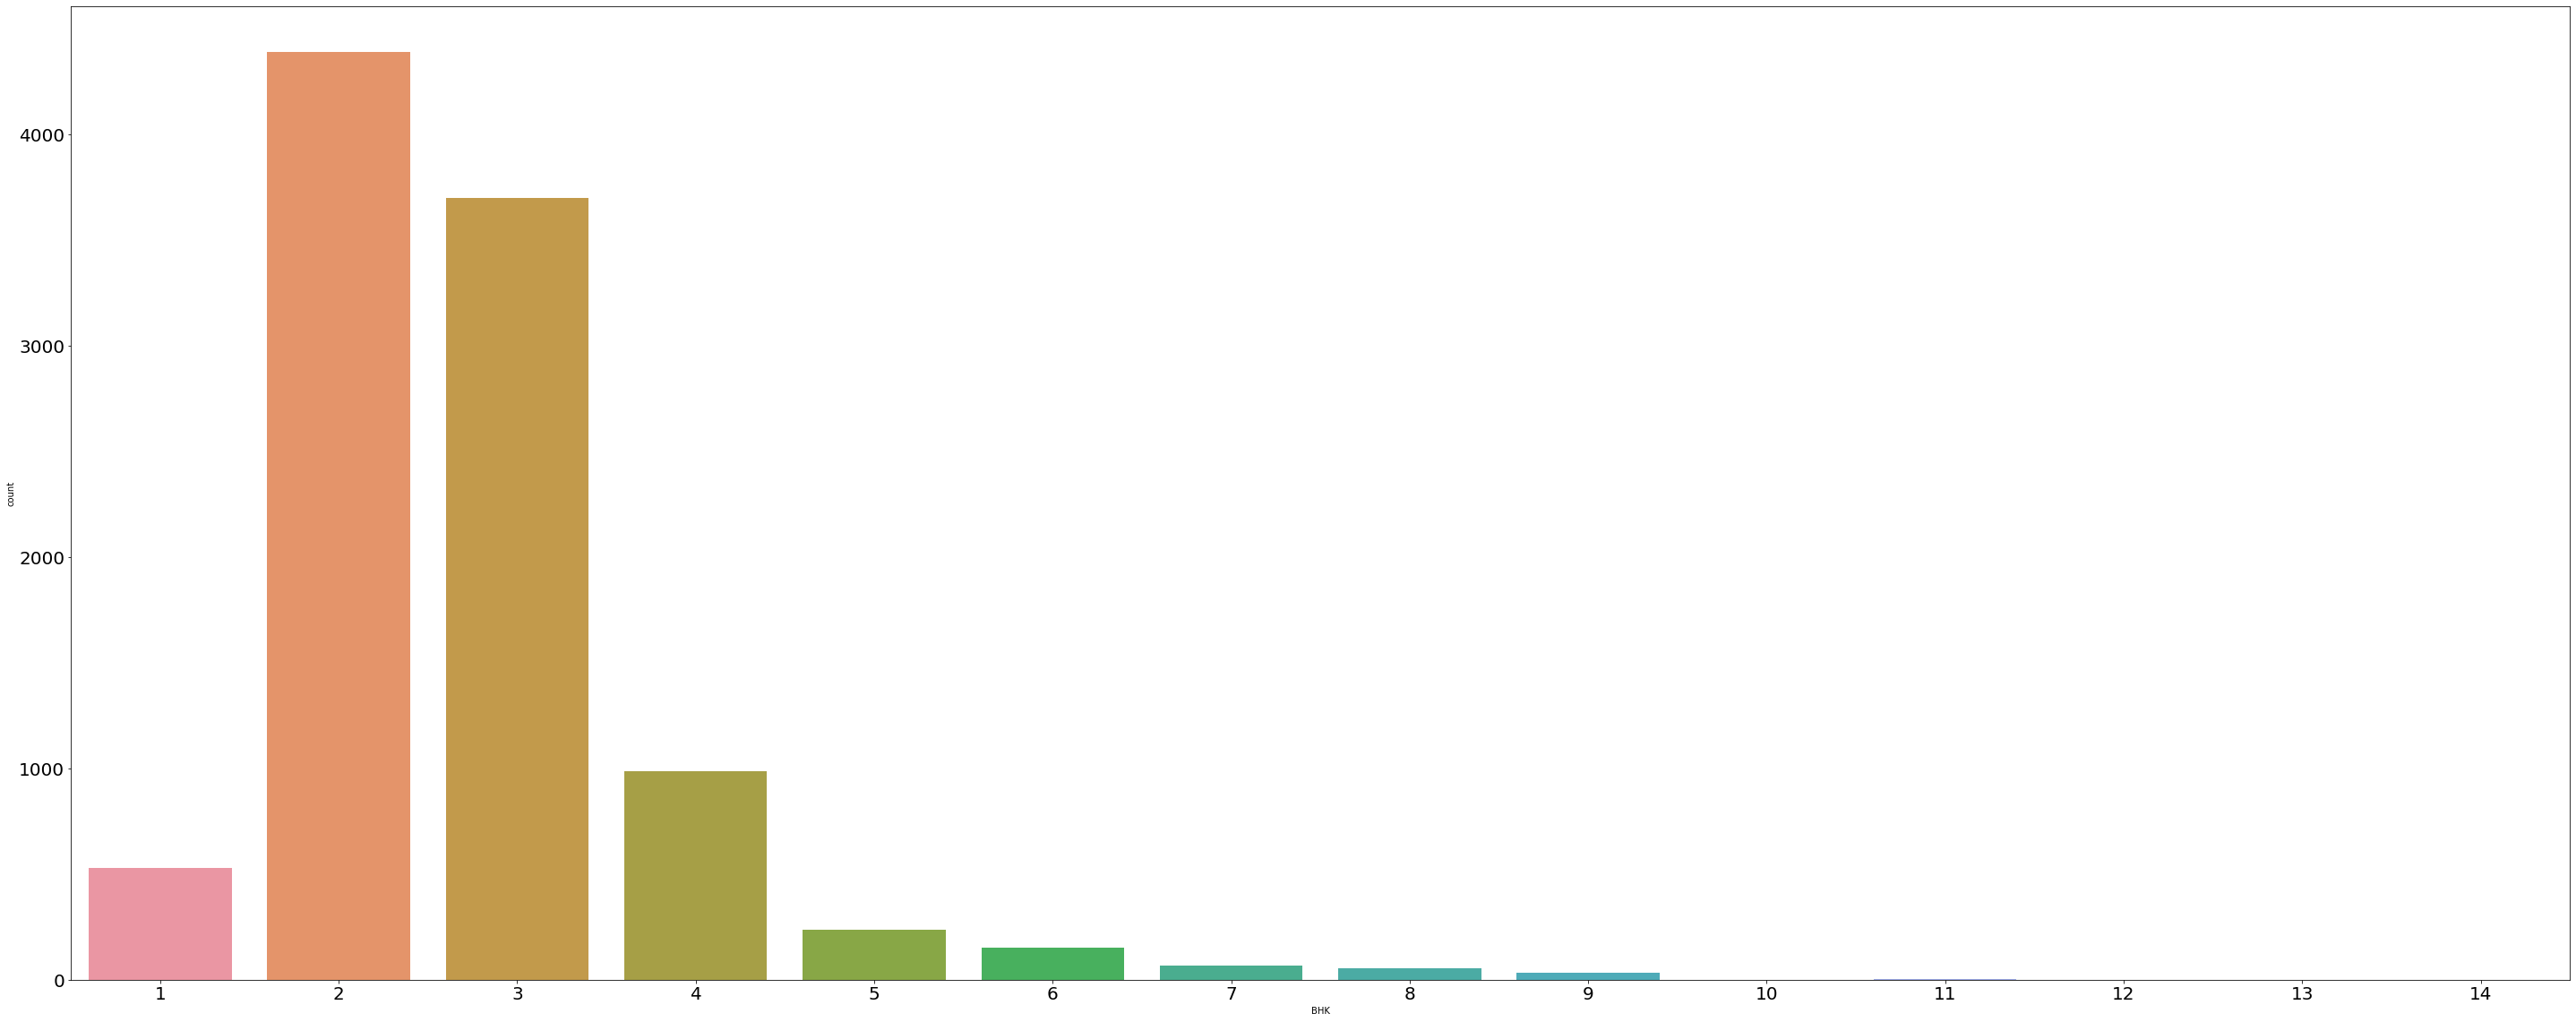

In [34]:
sns.countplot(x = 'BHK', data = main)
plt.show()

In [35]:
main.avg_2bhk_rent.fillna(main.avg_2bhk_rent.mean() * 1.5, inplace=True)

In [36]:
main.isnull().sum()

area_type           0
location            0
total_sqft          0
bath                0
balcony             0
price               0
BHK                 0
avg_2bhk_rent       0
dist_from_city    956
dtype: int64

### for imputing the missing values in location, let us take the mode distance and use that for the imputation since there is no much difference between mode and mean distance. We are taking the decision to use mode which is more than mean considering the max distance and also the actual mean wont be affected much considering the number of missing values

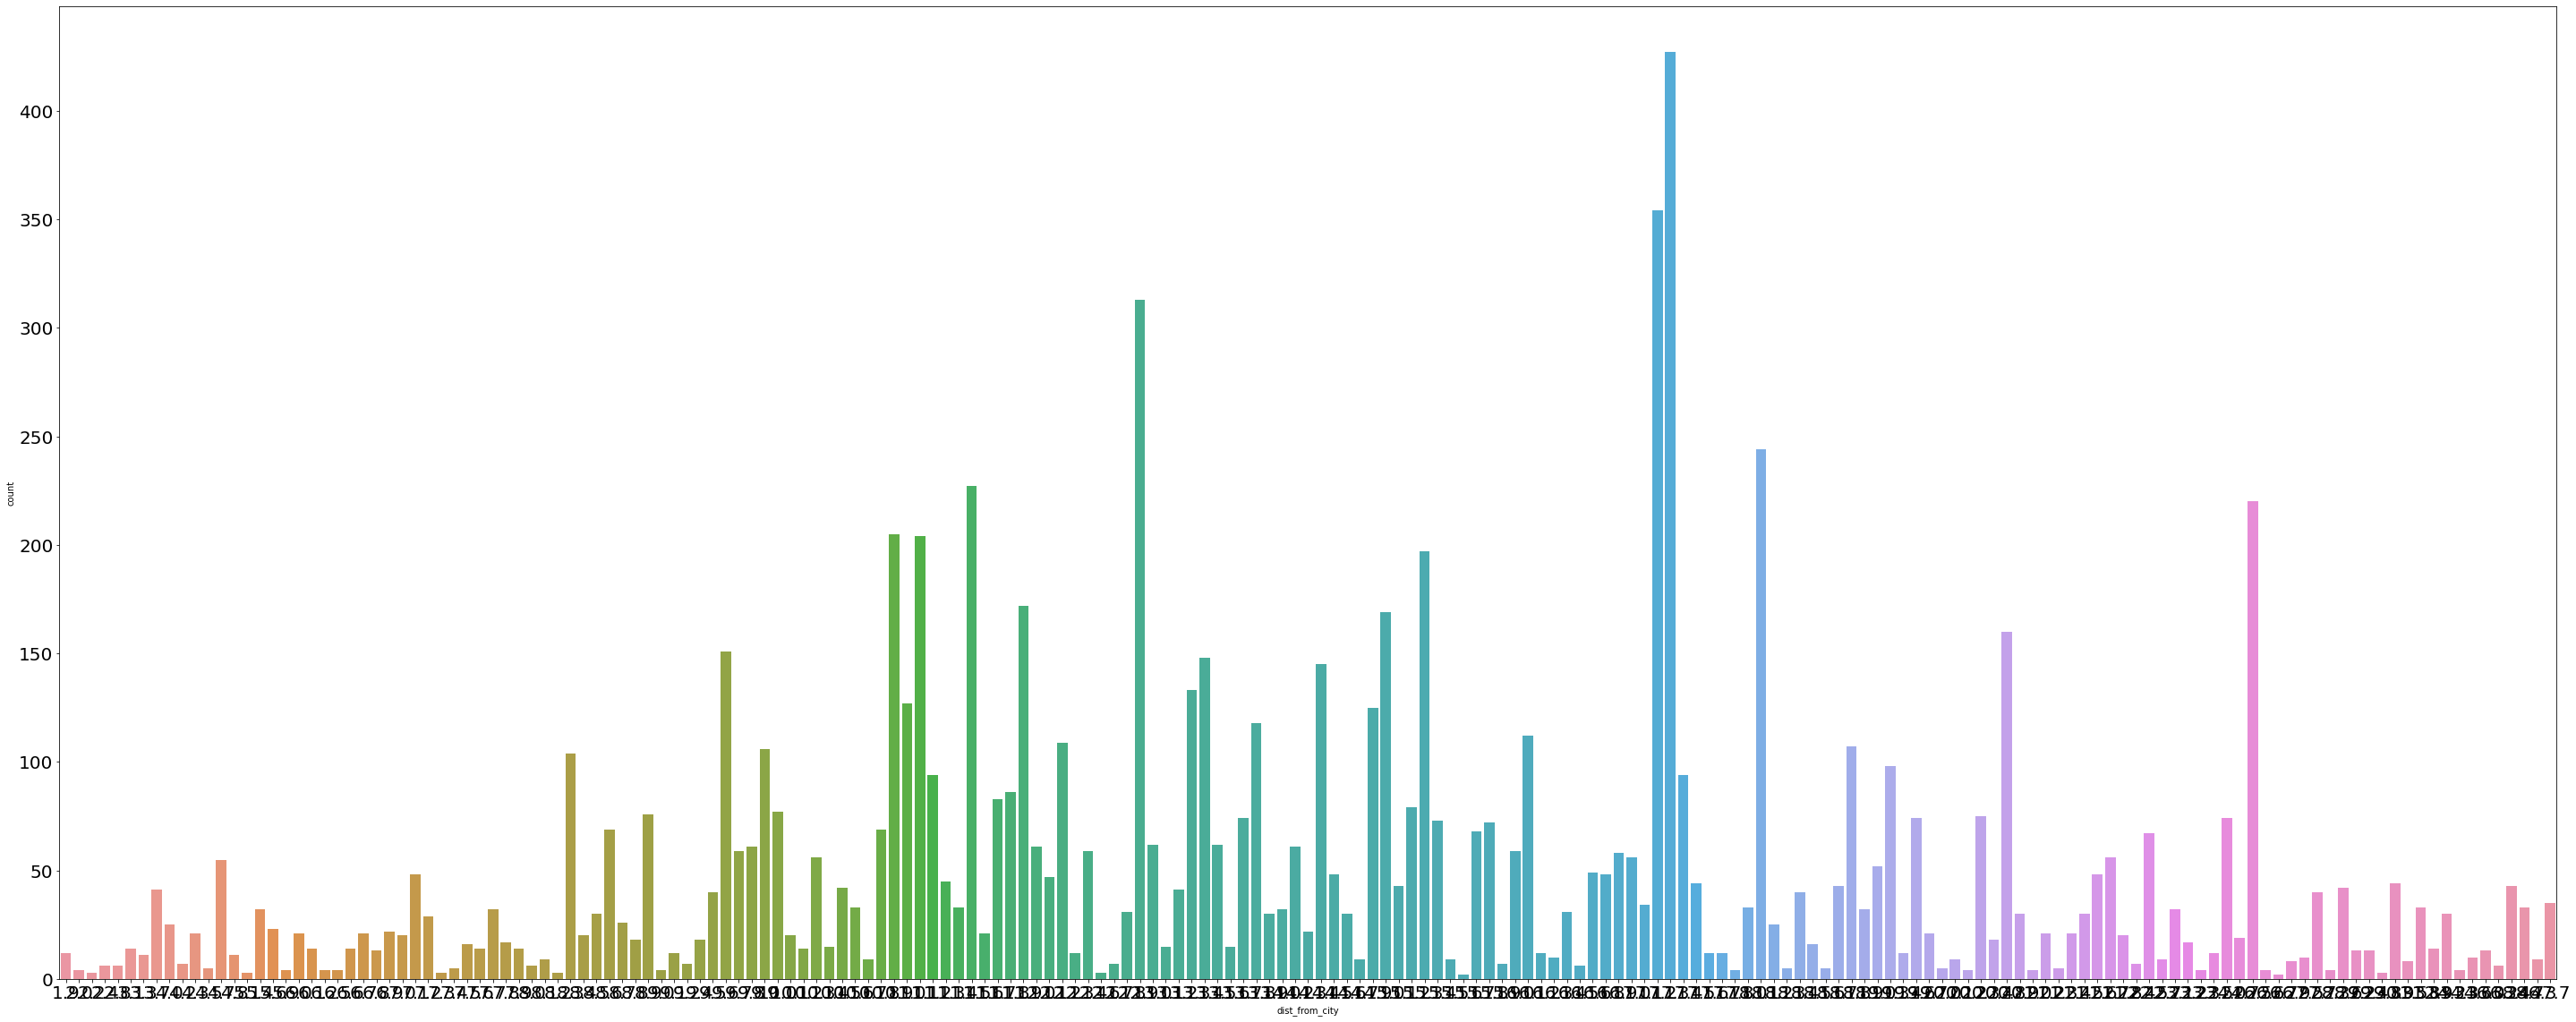

In [37]:
sns.countplot(x = 'dist_from_city', data = main)
plt.show()

In [38]:
main.dist_from_city.mode()

0    17.3
Name: dist_from_city, dtype: float64

In [39]:
main.dist_from_city.max()

47.7

In [40]:
main.dist_from_city.mean()

15.235820733166443

In [41]:
main.dist_from_city.fillna(main.dist_from_city.mode()[0], inplace=True)

In [42]:
main.isnull().sum()

area_type         0
location          0
total_sqft        0
bath              0
balcony           0
price             0
BHK               0
avg_2bhk_rent     0
dist_from_city    0
dtype: int64

In [43]:
main.dist_from_city.mean()

15.43025913883121

### Let us now feature engineer the location column

### Let us now Label encode the location considering that dummy encoding will create more features that the test dataset may not match. (based on previous iterations/trials)

In [44]:
main.head()

,area_type,location,total_sqft,bath,balcony,price,BHK,avg_2bhk_rent,dist_from_city
0,Super built-up Area,Electronic City Phase II,1056.0,2.0,1.0,39.07,2,11500.000000,19.3
1,Plot Area,Chikka Tirupathi,2600.0,5.0,3.0,120.00,4,23014.768421,34.6
2,Built-up Area,Uttarahalli,1440.0,2.0,3.0,62.00,3,19750.000000,12.9
3,Super built-up Area,Lingadheeranahalli,1521.0,3.0,1.0,95.00,3,23014.768421,21.4
4,Super built-up Area,Kothanur,1200.0,2.0,1.0,51.00,2,16375.000000,11.8


In [45]:
from sklearn.preprocessing import LabelEncoder

In [46]:
lenc = LabelEncoder()
main['location'] = lenc.fit_transform(main['location'])

In [47]:
main.head()

,area_type,location,total_sqft,bath,balcony,price,BHK,avg_2bhk_rent,dist_from_city
0,Super built-up Area,373,1056.0,2.0,1.0,39.07,2,11500.000000,19.3
1,Plot Area,281,2600.0,5.0,3.0,120.00,4,23014.768421,34.6
2,Built-up Area,1053,1440.0,2.0,3.0,62.00,3,19750.000000,12.9
3,Super built-up Area,681,1521.0,3.0,1.0,95.00,3,23014.768421,21.4
4,Super built-up Area,641,1200.0,2.0,1.0,51.00,2,16375.000000,11.8


In [48]:
from sklearn.preprocessing import OrdinalEncoder

In [49]:
oenc = OrdinalEncoder(categories=[['Carpet  Area', 'Built-up  Area', 'Super built-up  Area', 'Plot  Area']])
main['area_type'] = oenc.fit_transform(main['area_type'].values.reshape(-1,1))

In [50]:
main.head()

,area_type,location,total_sqft,bath,balcony,price,BHK,avg_2bhk_rent,dist_from_city
0,2.0,373,1056.0,2.0,1.0,39.07,2,11500.000000,19.3
1,3.0,281,2600.0,5.0,3.0,120.00,4,23014.768421,34.6
2,1.0,1053,1440.0,2.0,3.0,62.00,3,19750.000000,12.9
3,2.0,681,1521.0,3.0,1.0,95.00,3,23014.768421,21.4
4,2.0,641,1200.0,2.0,1.0,51.00,2,16375.000000,11.8


In [51]:
main.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10149 entries, 0 to 10148
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   area_type       10149 non-null  float64
 1   location        10149 non-null  int32  
 2   total_sqft      10149 non-null  float64
 3   bath            10149 non-null  float64
 4   balcony         10149 non-null  float64
 5   price           10149 non-null  float64
 6   BHK             10149 non-null  int64  
 7   avg_2bhk_rent   10149 non-null  float64
 8   dist_from_city  10149 non-null  float64
dtypes: float64(7), int32(1), int64(1)
memory usage: 753.2 KB


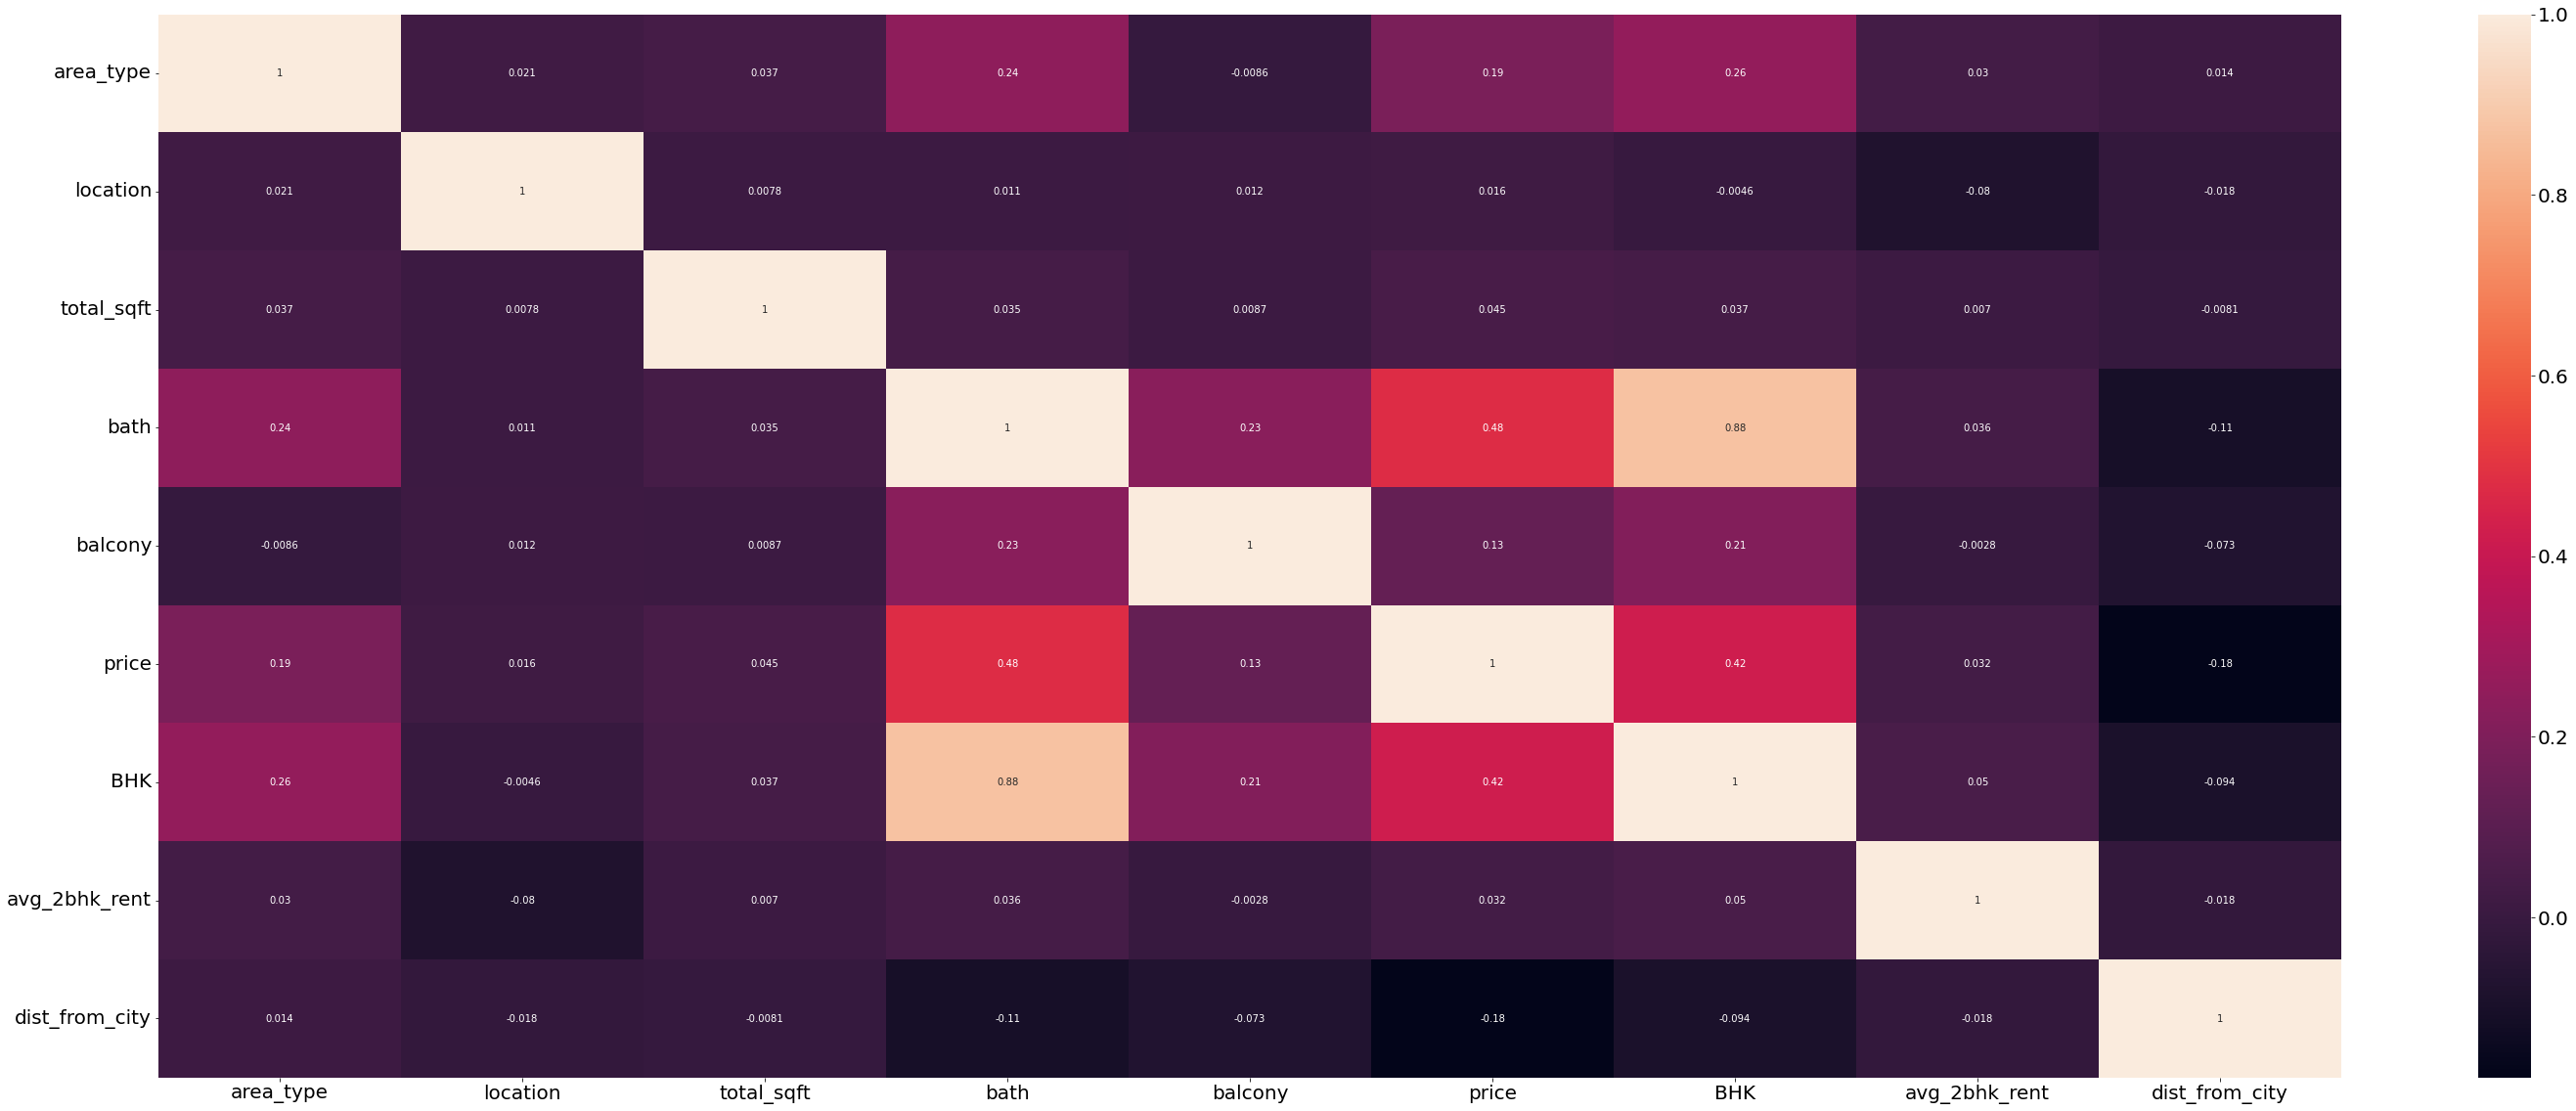

In [52]:
sns.heatmap(main.corr(), annot=True)
plt.show()

### Now we have converted all categorical columns to numeric columns. Let us build our Regression Model using sklearn

### Before that let us split the data into independent and dependent variables.

In [53]:
x = main.drop('price', axis = 1)
y = main['price']

In [54]:
import xgboost as xg

In [55]:
xgb_r = xg.XGBRegressor(seed = 1)

In [56]:
xgb_r_model = xgb_r.fit(x, y)

### Now let us import the test dataset and perform the same type of data cleaning that we performed over the train dataset and then predict the price for those entires in the test data

In [57]:
test = pd.read_csv('test.csv')
test.head()

,ID,area_type,availability,location,size,society,total_sqft,bath,balcony
0,0,Super built-up Area,Ready To Move,Chamrajpet,2 BHK,NaN,650,1.0,1.0
1,1,Super built-up Area,Ready To Move,7th Phase JP Nagar,3 BHK,SrncyRe,1370,2.0,1.0
2,2,Super built-up Area,Ready To Move,Whitefield,3 BHK,AjhalNa,1725,3.0,2.0
3,3,Built-up Area,Ready To Move,Jalahalli,2 BHK,NaN,1000,2.0,0.0
4,4,Plot Area,Ready To Move,TC Palaya,1 Bedroom,NaN,1350,1.0,0.0


### dropping ID, availability and society from the dataset

In [58]:
test = test.drop(['ID','availability','society'], axis = 1)

### We cannot drop any rows because the submission file needs 2664 rows. Hence we will impute missing values.

- We will deal with size later because we need to standardize the data format (we will add the mode value).
- We will add mode value of bath for the missing values in bath
- we will add mode value of balcony for the missing values in balcony

### The mode values for the size/BHK, bath, balcony seen from the train data is as below

In [59]:
main['BHK'].mode()

0    2
Name: BHK, dtype: int64

In [60]:
main['balcony'].mode()

0    2.0
Name: balcony, dtype: float64

### Since in reality we wont have the test data, let us impute the missing values in our test data set with the mode and mean values of the respective columns from the train dataset

In [61]:
test['balcony'].replace(np.NaN, 2.0, inplace = True)

In [62]:
test.isnull().sum()

area_type     0
location      0
size          2
total_sqft    0
bath          8
balcony       0
dtype: int64

### Lets perform all the data cleaning and feature engineering on the test set that we performed on our train set

### To perform cleaning on size column the way we intend to do, we should not have missing values. We know that the mode of the size/BHK from the train dataset is 2. Let us impute the missing values in size of test data with this mode value from the train data and then go ahead and clean the size column similar to what was done on train data

In [63]:
test['size'].replace(np.NaN, '2 BHK', inplace = True)

In [64]:
test.isnull().sum()

area_type     0
location      0
size          0
total_sqft    0
bath          8
balcony       0
dtype: int64

In [65]:
test.head()

,area_type,location,size,total_sqft,bath,balcony
0,Super built-up Area,Chamrajpet,2 BHK,650,1.0,1.0
1,Super built-up Area,7th Phase JP Nagar,3 BHK,1370,2.0,1.0
2,Super built-up Area,Whitefield,3 BHK,1725,3.0,2.0
3,Built-up Area,Jalahalli,2 BHK,1000,2.0,0.0
4,Plot Area,TC Palaya,1 Bedroom,1350,1.0,0.0


In [66]:
test['BHK'] = test['size'].apply(lambda x: int(x.split(' ')[0]))

In [67]:
test.total_sqft = test.total_sqft.apply(convert_range_to_avg_sqft)
test.total_sqft = test.total_sqft.apply(convert_Sqmts_to_sqft)
test.total_sqft = test.total_sqft.apply(convert_Sqyards_to_sqft)
test.total_sqft = test.total_sqft.apply(convert_Cents_to_sqft)
test.total_sqft = test.total_sqft.apply(convert_Acres_to_sqft)
test.total_sqft = test.total_sqft.apply(convert_Guntha_to_sqft)
test.total_sqft = test.total_sqft.apply(convert_Grounds_to_sqft)

In [68]:
test = test.drop('size', axis = 1)
test.head()

,area_type,location,total_sqft,bath,balcony,BHK
0,Super built-up Area,Chamrajpet,650,1.0,1.0,2
1,Super built-up Area,7th Phase JP Nagar,1370,2.0,1.0,3
2,Super built-up Area,Whitefield,1725,3.0,2.0,3
3,Built-up Area,Jalahalli,1000,2.0,0.0,2
4,Plot Area,TC Palaya,1350,1.0,0.0,1


### Let us merge the rent and dist datasets with our test data

In [69]:
test = pd.merge(test, rent, 'left', 'location')
test.head()

,area_type,location,total_sqft,bath,balcony,BHK,avg_2bhk_rent
0,Super built-up Area,Chamrajpet,650,1.0,1.0,2,15875.0
1,Super built-up Area,7th Phase JP Nagar,1370,2.0,1.0,3,NaN
2,Super built-up Area,Whitefield,1725,3.0,2.0,3,14981.0
3,Built-up Area,Jalahalli,1000,2.0,0.0,2,11000.0
4,Plot Area,TC Palaya,1350,1.0,0.0,1,NaN


In [70]:
test = pd.merge(test, dist, 'left', 'location')
test.head()

,area_type,location,total_sqft,bath,balcony,BHK,avg_2bhk_rent,dist_from_city
0,Super built-up Area,Chamrajpet,650,1.0,1.0,2,15875.0,6.7
1,Super built-up Area,7th Phase JP Nagar,1370,2.0,1.0,3,NaN,11.0
2,Super built-up Area,Whitefield,1725,3.0,2.0,3,14981.0,17.3
3,Built-up Area,Jalahalli,1000,2.0,0.0,2,11000.0,16.6
4,Plot Area,TC Palaya,1350,1.0,0.0,1,NaN,12.2


In [71]:
test.isnull().sum()

area_type            0
location             0
total_sqft           0
bath                 8
balcony              0
BHK                  0
avg_2bhk_rent     1752
dist_from_city     274
dtype: int64

### Let us impute the missing values in rent and dist columns with our earlier logic used in main dataset.

In [72]:
test.dist_from_city.fillna(test.dist_from_city.mode()[0], inplace=True)

In [73]:
test.avg_2bhk_rent.fillna(test.avg_2bhk_rent.mean() * 1.5, inplace=True)

In [74]:
test.isnull().sum()

area_type         0
location          0
total_sqft        0
bath              8
balcony           0
BHK               0
avg_2bhk_rent     0
dist_from_city    0
dtype: int64

In [75]:
test[test.bath.isnull()]

,area_type,location,total_sqft,bath,balcony,BHK,avg_2bhk_rent,dist_from_city
70,Super built-up Area,Sarjapur Road,1773.5,NaN,2.0,3,23980.013158,17.2
363,Plot Area,Yelahanka,1500.0,NaN,2.0,2,8500.000000,20.8
641,Super built-up Area,Hennur,3517.0,NaN,2.0,4,17529.000000,10.0
840,Super built-up Area,Kanakpura Road,525,NaN,2.0,1,23980.013158,26.5
913,Plot Area,Hosur Road,1350,NaN,2.0,2,23980.013158,19.0
2112,Built-up Area,Bettahalsoor,3210,NaN,2.0,5,23980.013158,17.2
2205,Super built-up Area,KR Puram,2283.0,NaN,2.0,4,23980.013158,11.9
2584,Super built-up Area,Devanahalli,1075.0,NaN,2.0,1,17302.000000,38.7


### The missing values in bath column is for houses with bhk mode of 1, 2 and 4. Let us impute these missing values for bath with logic of every house has 1 exta bath to the number of bhk. Here we will impute the missing values with the mean of this value considering the mode of the missing value rows bhk. So the mean that we are going to impute will be (4+3+5+2+3+6+5+2)/8

In [76]:
(4+3+5+2+3+6+5+2)/8

3.75

### Let us floor the above value and impute the missing values for bath as 3

In [77]:
test.bath.fillna(3, inplace=True)

In [78]:
test.isnull().sum()

area_type         0
location          0
total_sqft        0
bath              0
balcony           0
BHK               0
avg_2bhk_rent     0
dist_from_city    0
dtype: int64

### Let us now Label encode the location column for the same reason as stated while encoding the train dataset

In [79]:
test['location'] = test['location'].map(lambda x: '<unknown>' if x not in lenc.classes_ else x)
lenc.classes_ = np.append(lenc.classes_, '<unknown>')
test['location'] = lenc.transform(test['location'])

In [80]:
test.head()

,area_type,location,total_sqft,bath,balcony,BHK,avg_2bhk_rent,dist_from_city
0,Super built-up Area,268,650,1.0,1.0,2,15875.000000,6.7
1,Super built-up Area,65,1370,2.0,1.0,3,23980.013158,11.0
2,Super built-up Area,1121,1725,3.0,2.0,3,14981.000000,17.3
3,Built-up Area,529,1000,2.0,0.0,2,11000.000000,16.6
4,Plot Area,1017,1350,1.0,0.0,1,23980.013158,12.2


In [81]:
test['area_type'] = oenc.transform(test['area_type'].values.reshape(-1,1))

In [82]:
test.head()

,area_type,location,total_sqft,bath,balcony,BHK,avg_2bhk_rent,dist_from_city
0,2.0,268,650,1.0,1.0,2,15875.000000,6.7
1,2.0,65,1370,2.0,1.0,3,23980.013158,11.0
2,2.0,1121,1725,3.0,2.0,3,14981.000000,17.3
3,1.0,529,1000,2.0,0.0,2,11000.000000,16.6
4,3.0,1017,1350,1.0,0.0,1,23980.013158,12.2


In [83]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2664 entries, 0 to 2663
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   area_type       2664 non-null   float64
 1   location        2664 non-null   int32  
 2   total_sqft      2664 non-null   object 
 3   bath            2664 non-null   float64
 4   balcony         2664 non-null   float64
 5   BHK             2664 non-null   int64  
 6   avg_2bhk_rent   2664 non-null   float64
 7   dist_from_city  2664 non-null   float64
dtypes: float64(5), int32(1), int64(1), object(1)
memory usage: 176.9+ KB


### Convert total_sqft from object to float

In [84]:
test['total_sqft'] = test['total_sqft'].astype(float)

In [85]:
test.head()

,area_type,location,total_sqft,bath,balcony,BHK,avg_2bhk_rent,dist_from_city
0,2.0,268,650.0,1.0,1.0,2,15875.000000,6.7
1,2.0,65,1370.0,2.0,1.0,3,23980.013158,11.0
2,2.0,1121,1725.0,3.0,2.0,3,14981.000000,17.3
3,1.0,529,1000.0,2.0,0.0,2,11000.000000,16.6
4,3.0,1017,1350.0,1.0,0.0,1,23980.013158,12.2


In [86]:
main.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10149 entries, 0 to 10148
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   area_type       10149 non-null  float64
 1   location        10149 non-null  int32  
 2   total_sqft      10149 non-null  float64
 3   bath            10149 non-null  float64
 4   balcony         10149 non-null  float64
 5   price           10149 non-null  float64
 6   BHK             10149 non-null  int64  
 7   avg_2bhk_rent   10149 non-null  float64
 8   dist_from_city  10149 non-null  float64
dtypes: float64(7), int32(1), int64(1)
memory usage: 753.2 KB


In [87]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2664 entries, 0 to 2663
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   area_type       2664 non-null   float64
 1   location        2664 non-null   int32  
 2   total_sqft      2664 non-null   float64
 3   bath            2664 non-null   float64
 4   balcony         2664 non-null   float64
 5   BHK             2664 non-null   int64  
 6   avg_2bhk_rent   2664 non-null   float64
 7   dist_from_city  2664 non-null   float64
dtypes: float64(6), int32(1), int64(1)
memory usage: 176.9 KB


In [88]:
test.isnull().sum()

area_type         0
location          0
total_sqft        0
bath              0
balcony           0
BHK               0
avg_2bhk_rent     0
dist_from_city    0
dtype: int64

### Let us check the shape of both the train and test datasets. The number of features should be n-1 in test since the target variable is not present in the test data

In [89]:
main.shape

(10149, 9)

In [90]:
test.shape

(2664, 8)

### Now that we have converted all categorical columns to numeric columns and also verified that the features are same in both the datasets, let us predict using our test dataset using the Regression Model that we trained with the train dataset

In [91]:
submission = pd.DataFrame()
submission['ID'] = test.index
submission['price'] = xgb_r_model.predict(test)

In [92]:
import csv
with open('Deepak_Ramamurthy_submission_03092022_XGB_Regression_Final.csv', 'w', encoding='UTF8', newline='') as f:
    writer = csv.writer(f)

    # write the header
    writer.writerow(submission.columns)

    # write multiple rows
    writer.writerows(submission.values)